#### Stefhany Rodriguez 


Supervised learning - Classification project:
- Logistic regression model 
- Decision tree model - pre prunning and posprunning

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

In [2]:
df_main = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Data Overview

- Observations
- Sanity checks

In [8]:
# Displaying the first 5 rows
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [10]:
# Displaying the last 5 rows 
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [12]:
#shape returns a tuple with the number of rows and columns 
rows, columns = data.shape
print('The dataset has', rows, 'rows.')
print('The dataset has', columns, 'columns.')

The dataset has 36275 rows.
The dataset has 19 columns.


In [14]:
#.describe() gives a summary statistical for a numerical column by default  
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


In [16]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


### Data types of the columns for the dataset

In [19]:
#dtypes is used to see data types of each column 
data_types_column = data.dtypes
print(data_types_column)

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


### Missing values

In [22]:
#Checking for missing values 
missing_values = data.isnull().sum()
print(missing_values)
print('')
it_has_missing_values = data.isnull().sum().any()
print("Are there any missing values: true or false?", it_has_missing_values)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Are there any missing values: true or false? False


### Duplicates

In [25]:
# Check if there's any duplicates 
duplicates= data.duplicated()
duplicates.sum()

0

In [27]:
# Drop the Booking_ID column first before we proceed forward.
data = data.drop(columns=['Booking_ID'])

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [31]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None, 
                      box_color="pink", hist_color="purple", 
                      mean_color="green", median_color="black", 
                      show_mean=True, show_median=True, mean_label=True, median_label=True):
    """
    Boxplot and histogram combined with additional customizations.

    Parameters:
    data (pd.DataFrame): The dataset containing the feature.
    feature (str): The feature/column name for which the plots are to be created.
    figsize (tuple): Size of figure (default (15,10)).
    kde (bool): Whether to show the density curve (default False).
    bins (int): Number of bins for histogram (default None).
    box_color (str): Color for the boxplot (default "pink").
    hist_color (str): Color for the histogram (default "purple").
    mean_color (str): Color for the mean line (default "green").
    median_color (str): Color for the median line (default "black").
    show_mean (bool): Whether to show the mean line (default True).
    show_median (bool): Whether to show the median line (default True).
    mean_label (bool): Whether to add label for the mean line (default True).
    median_label (bool): Whether to add label for the median line (default True).
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color=box_color
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color=hist_color)
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color=hist_color)
    
    if show_mean:
        ax_hist2.axvline(data[feature].mean(), color=mean_color, linestyle="--", label='Mean' if mean_label else "")
    if show_median:
        ax_hist2.axvline(data[feature].median(), color=median_color, linestyle="-", label='Median' if median_label else "")
    
    ax_hist2.set_title(f'Histogram of {feature}')
    ax_box2.set_title(f'Boxplot of {feature}')
    ax_hist2.set_xlabel(feature)
    ax_hist2.set_ylabel('Frequency')
    ax_hist2.grid(True)
    
    if mean_label or median_label:
        ax_hist2.legend()

    plt.tight_layout()
    plt.show()

## Univariate analysis & bivariate analysis along with the questions 

## Lead time 

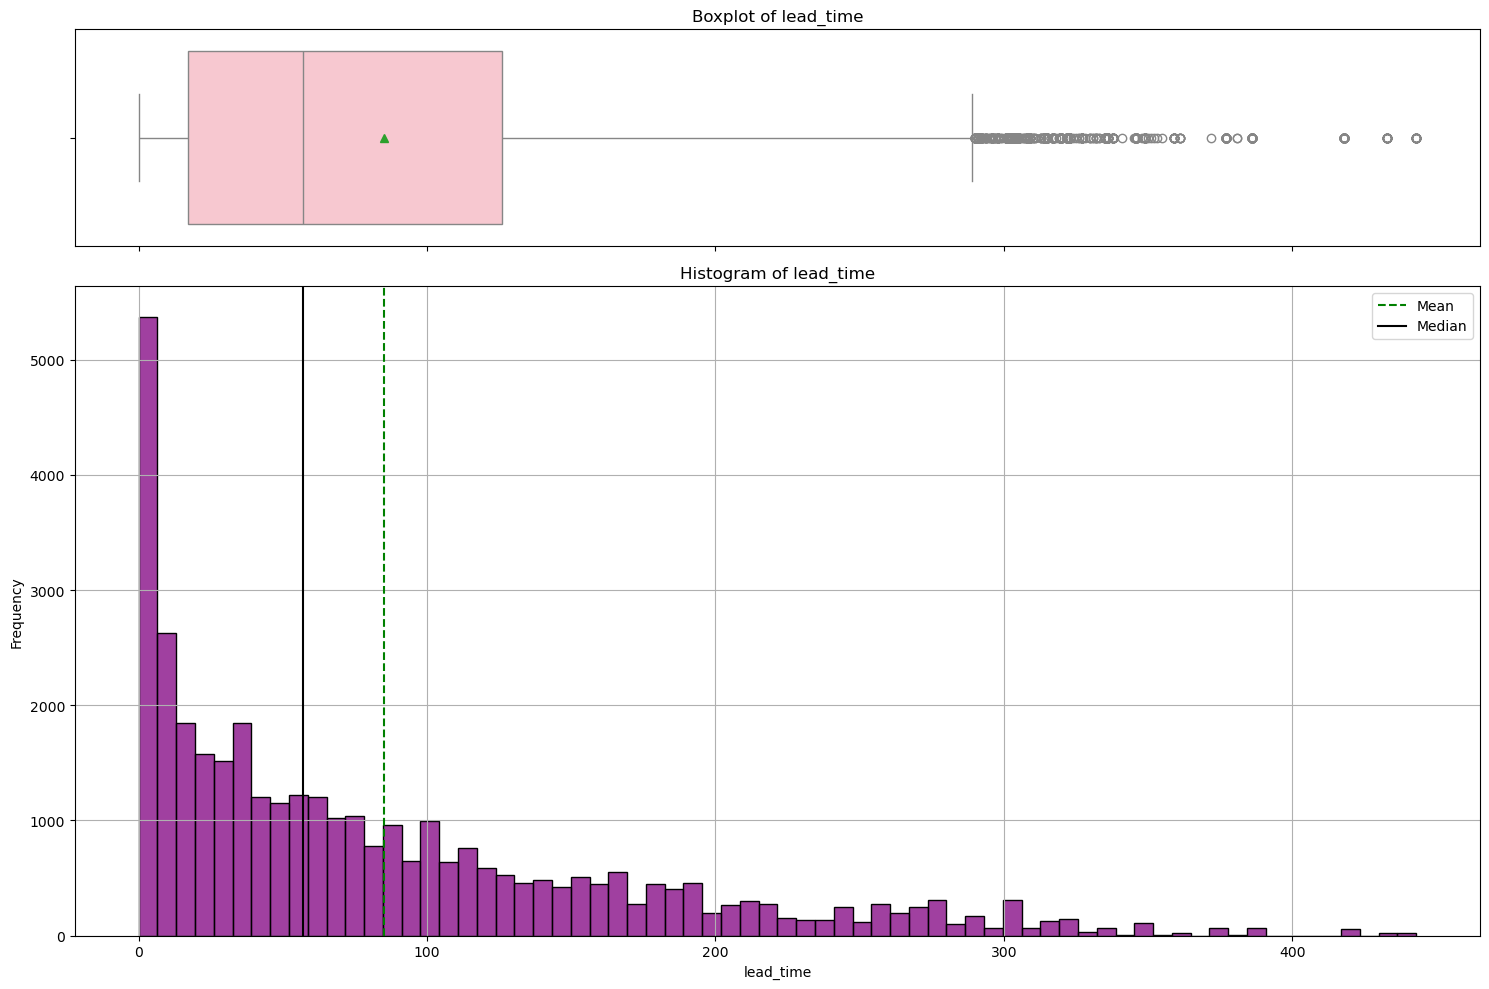

In [35]:
histogram_boxplot(data, "lead_time")

### Average price per room

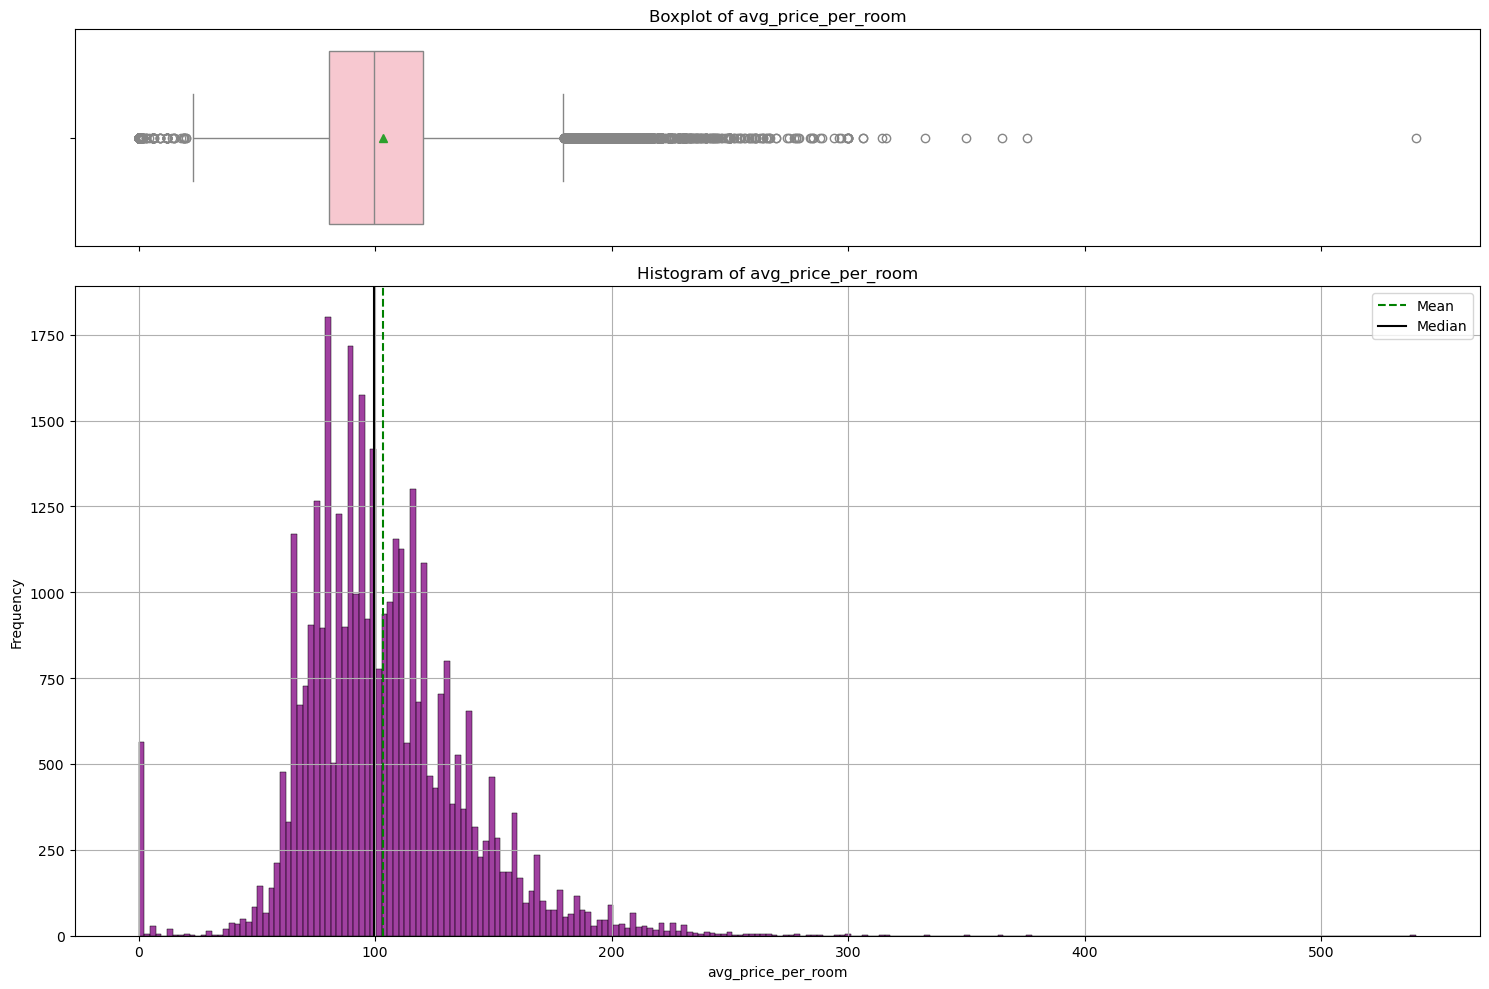

In [38]:
histogram_boxplot(data, "avg_price_per_room")

### Type of meal plan

([0, 1, 2, 3],
 [Text(0, 0, 'Meal Plan 1'),
  Text(1, 0, 'Not Selected'),
  Text(2, 0, 'Meal Plan 2'),
  Text(3, 0, 'Meal Plan 3')])

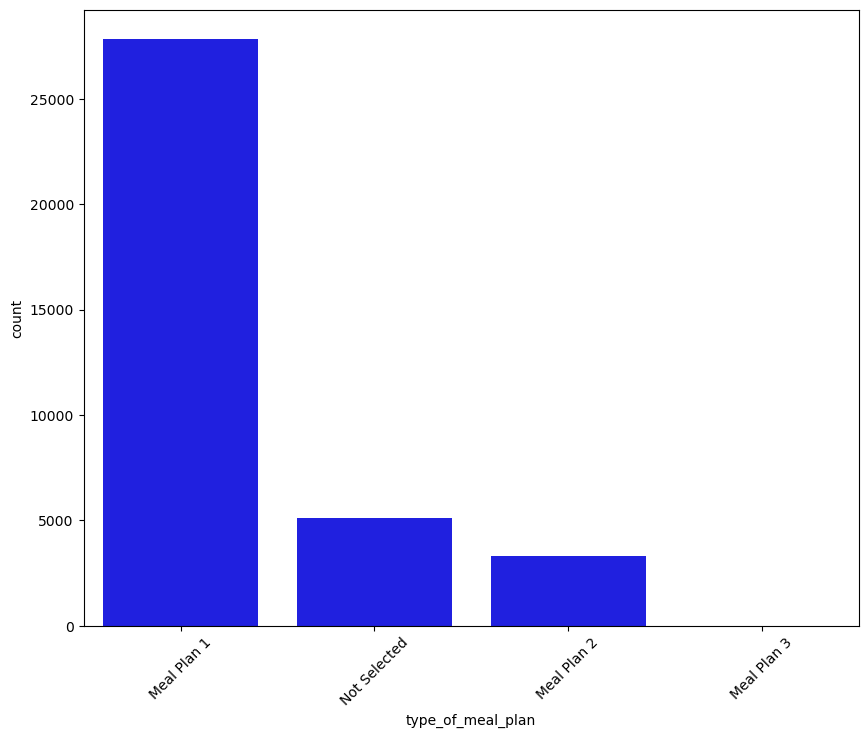

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='type_of_meal_plan', color='blue')
plt.xticks(rotation=45)

### Room type reserved 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

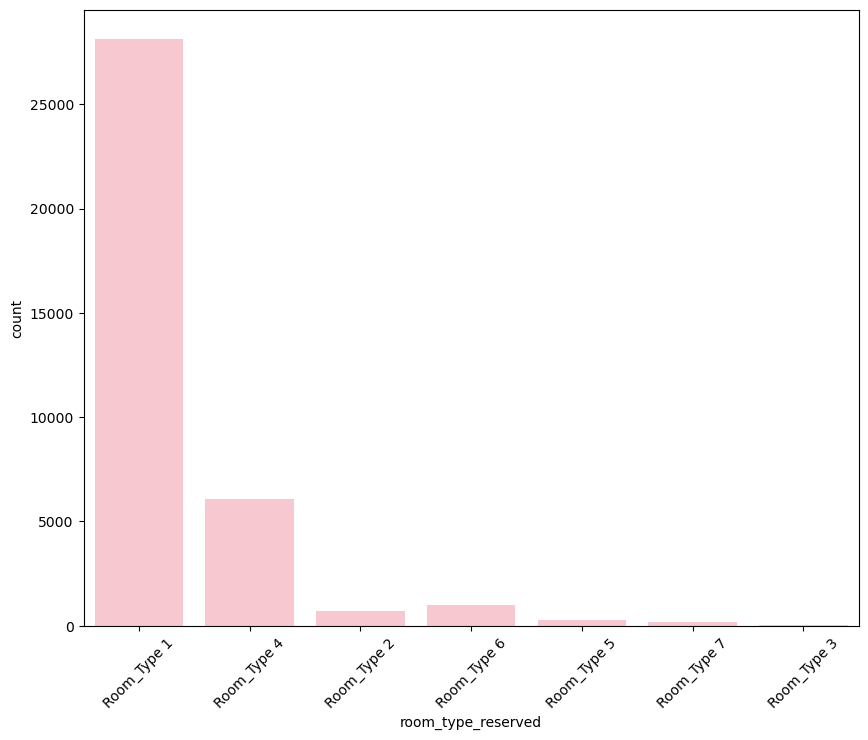

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='room_type_reserved', color='pink')
plt.xticks(rotation=45)

### 1. What are the busiest months in the hotel? 

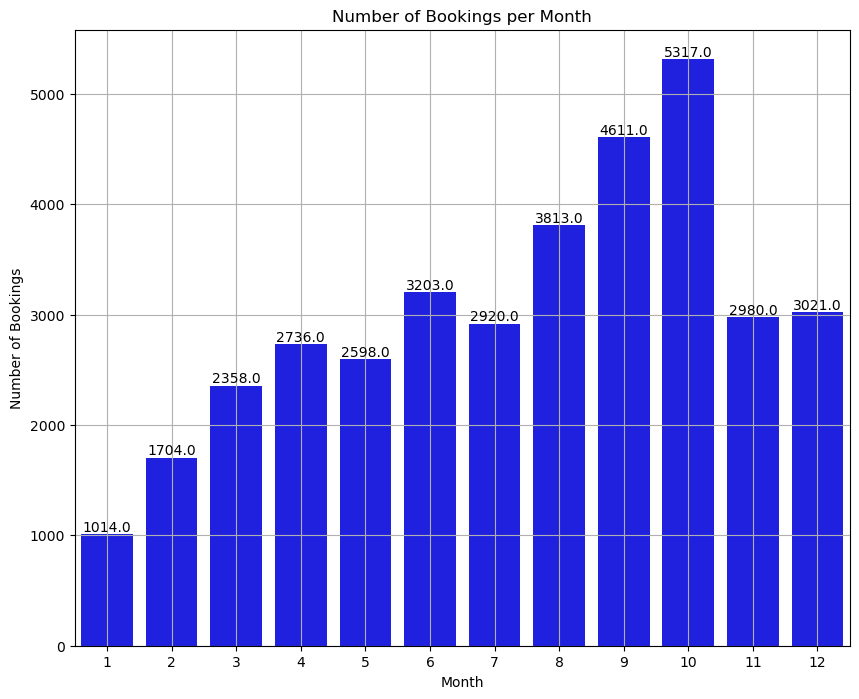

In [47]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=data, x='arrival_month', color='blue')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Month')
plt.grid(True)
plt.show()

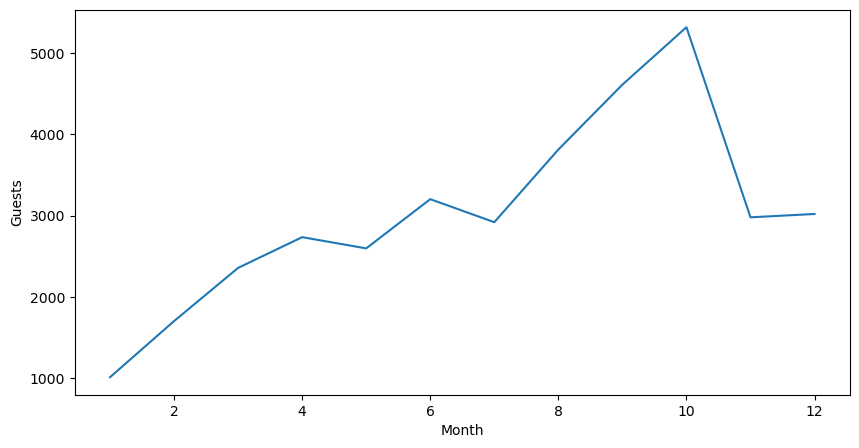

In [50]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* The busiest months are october, september, august, june and december. 

### 2. Which market segment do most of the guests come from?

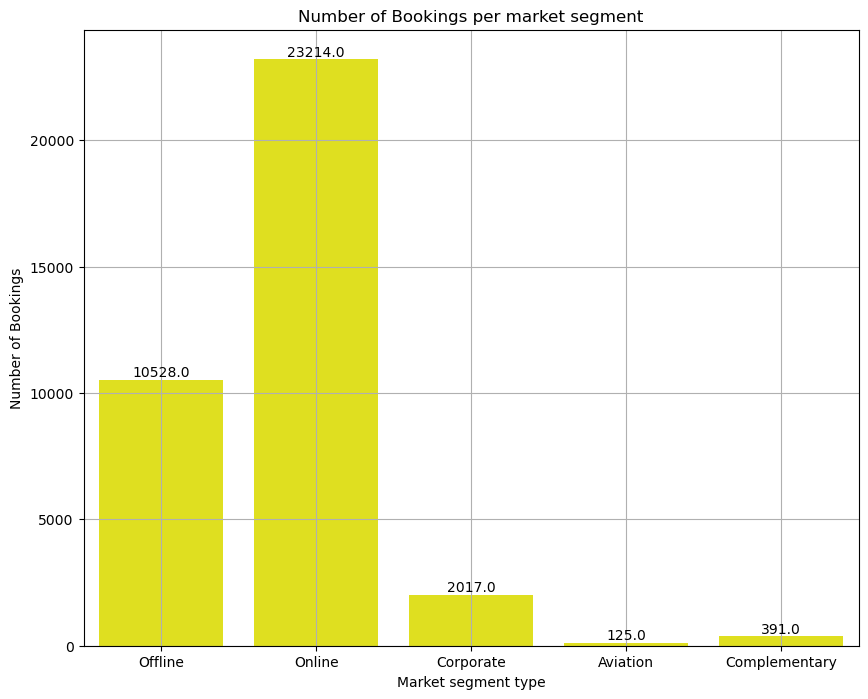

In [53]:
plt.figure(figsize=(10,8))
ax= sns.countplot(data=data, x='market_segment_type', color='yellow')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Market segment type')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per market segment')
plt.grid(True)
plt.show()

* Online segment is the one that most of the guests come from. 

### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

Average room prices for different market segments:
  market_segment_type  average_price
0            Aviation      100.70400
1       Complementary        3.14176
2           Corporate       82.91174
3             Offline       91.63268
4              Online      112.25685


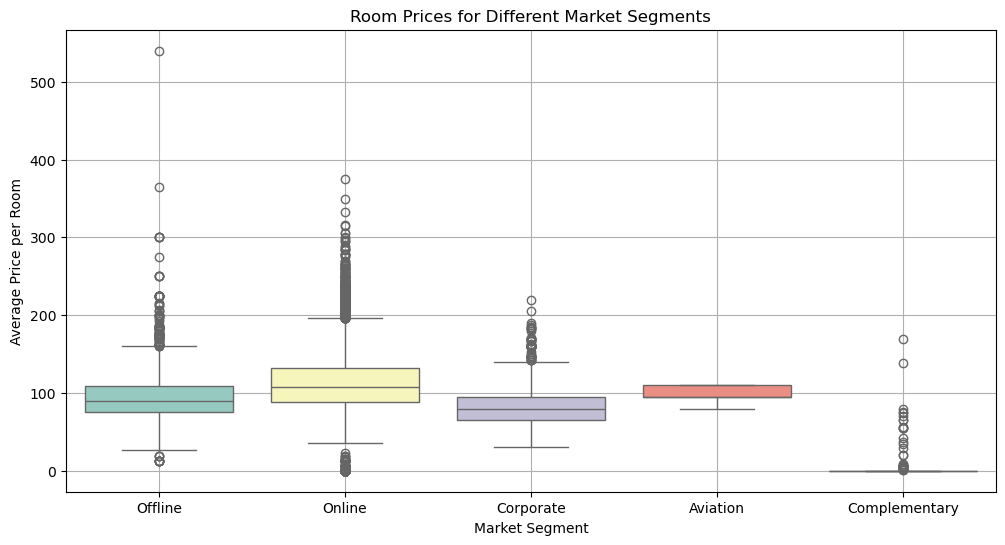

In [55]:
# Grouping by market_segment_type and calculating the average room price
market_segment_prices = data.groupby('market_segment_type')['avg_price_per_room'].mean().reset_index()
market_segment_prices.columns = ['market_segment_type', 'average_price']

# Print the average room prices for different market segments
print("Average room prices for different market segments:")
print(market_segment_prices)

# Create the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=data, x='market_segment_type', y='avg_price_per_room', palette='Set3')

# Set labels and title
plt.xlabel('Market Segment')
plt.ylabel('Average Price per Room')
plt.title('Room Prices for Different Market Segments')

# Show the plot
plt.grid(True)
plt.show()

* Online has the highest price, tend to be more expensive probably due to dynamic pricing in apps. Online customers are less price sensitive and more focus in facilities.
* Aviation bookings seems to be cheaper than online. Prices might be negociated at corporate rates.
* Corporate booking have the lowest rates normally due to company agreements.
* Offline is slightly cheaper than Online and it can include walk in travelers, it has less dynamic pricing. 

### 4. What percentage of bookings are canceled?

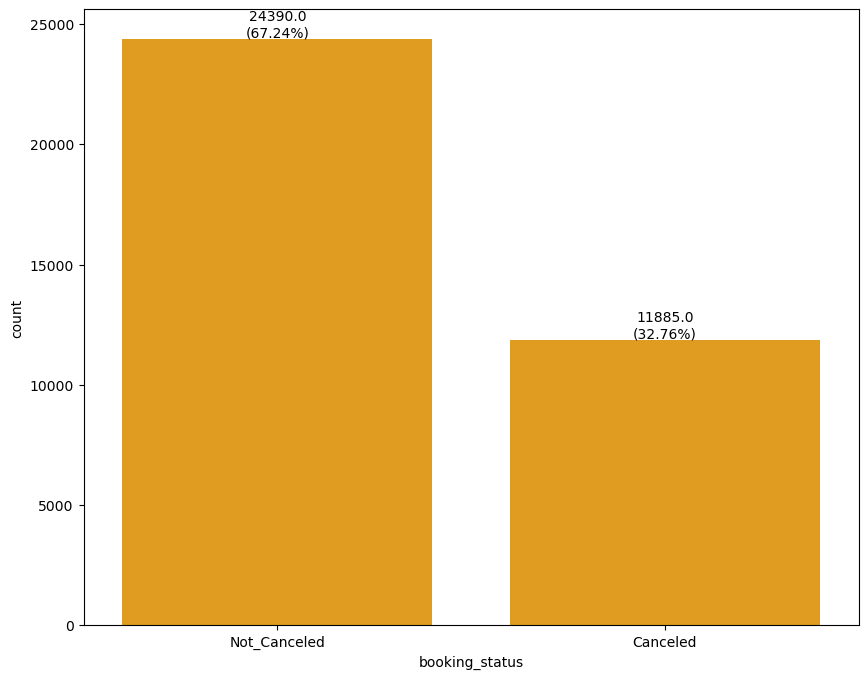

In [57]:
# Calculate the percentage of bookings canceled 
total_bookings = data.shape[0]
canceled_bookings = data[data['booking_status'] == 'Canceled'].shape[0]
percentage_canceled = (canceled_bookings / total_bookings) * 100

plt.figure(figsize=(10,8))
ax=sns.countplot(data=data, x='booking_status', color='orange')
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_bookings) * 100
    ax.annotate(f'{height}\n({percentage:.2f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

In [77]:
print("Percentage of bookings canceled:", round(percentage_canceled,2))

Percentage of bookings canceled: 32.76


### 5. What percentage of guests are repeating guests?

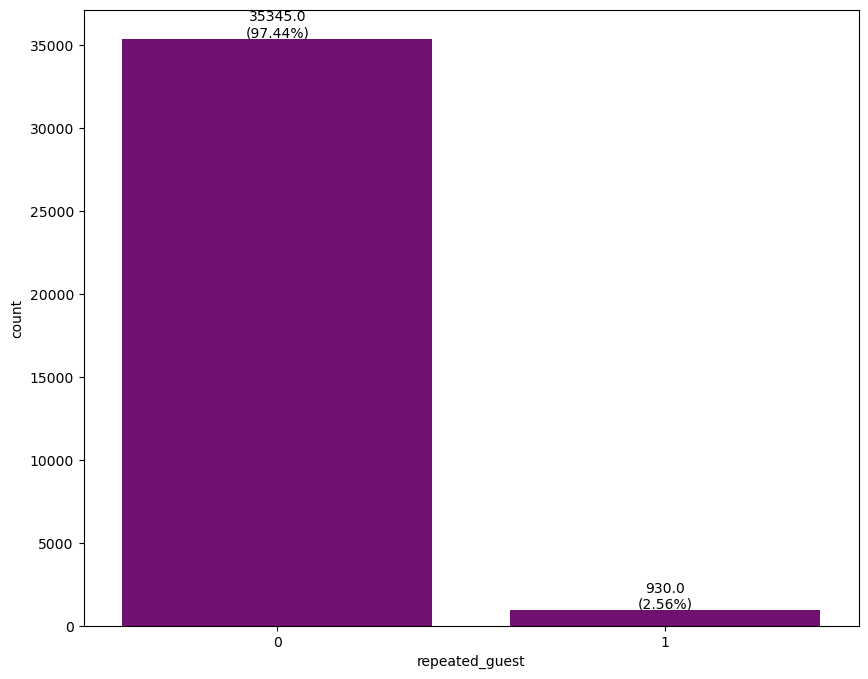

In [80]:
# Calculate the percentage of repeating guests
total_guests = data.shape[0]
repeating_guests = data[data['repeated_guest'] == 1 ].shape[0]
percentage_repeating = (repeating_guests / total_guests) * 100

plt.figure(figsize=(10,8))
ax=sns.countplot(data=data, x='repeated_guest', color='purple')
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_guests) * 100
    ax.annotate(f'{height}\n({percentage:.2f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

In [82]:
print("Percentage of repeating guests:", round(percentage_repeating,2), "%")

Percentage of repeating guests: 2.56 %


### 6. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [85]:
# Filter the DataFrame to include only repeating guests
repeating_guests_data = data[data['repeated_guest'] == 1]

# Calculate the total number of repeating guests
total_repeating_guests = repeating_guests_data.shape[0]

# Calculate the number of repeating guests who canceled their bookings
canceled_repeating_guests = repeating_guests_data[repeating_guests_data['booking_status'] == 'Canceled'].shape[0]

# Calculate the percentage of repeating guests who canceled their bookings
percentage_canceled_repeating_guests = (canceled_repeating_guests / total_repeating_guests) * 100

print("Percentage of repeating guests who canceled their bookings: ", round(percentage_canceled_repeating_guests, 3), "%")


Percentage of repeating guests who canceled their bookings:  1.72 %


### 7. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [88]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


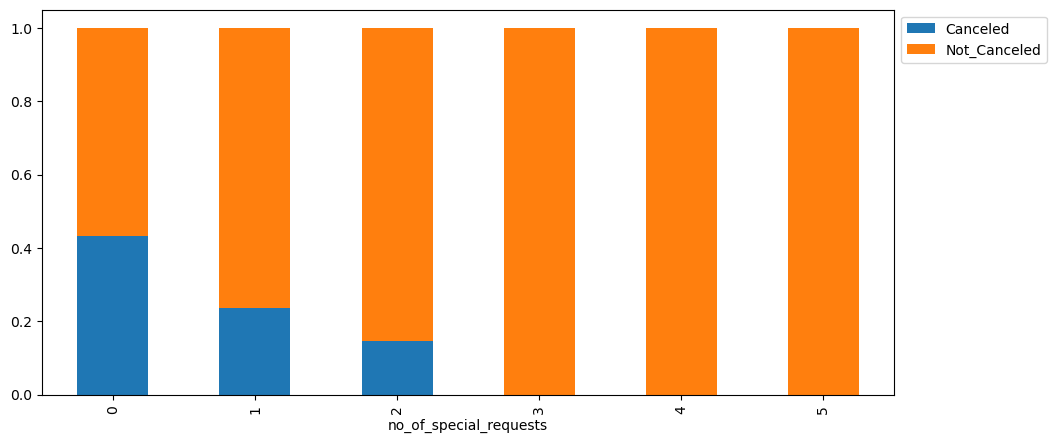

In [90]:
stacked_barplot(data, "no_of_special_requests", "booking_status") 

* It does affect, it is appearing that if the client is placing more special requests is more likely to show up to the hotel, no cancel the reservation. 

### 8. Analyze booking status and average price per room

In [94]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

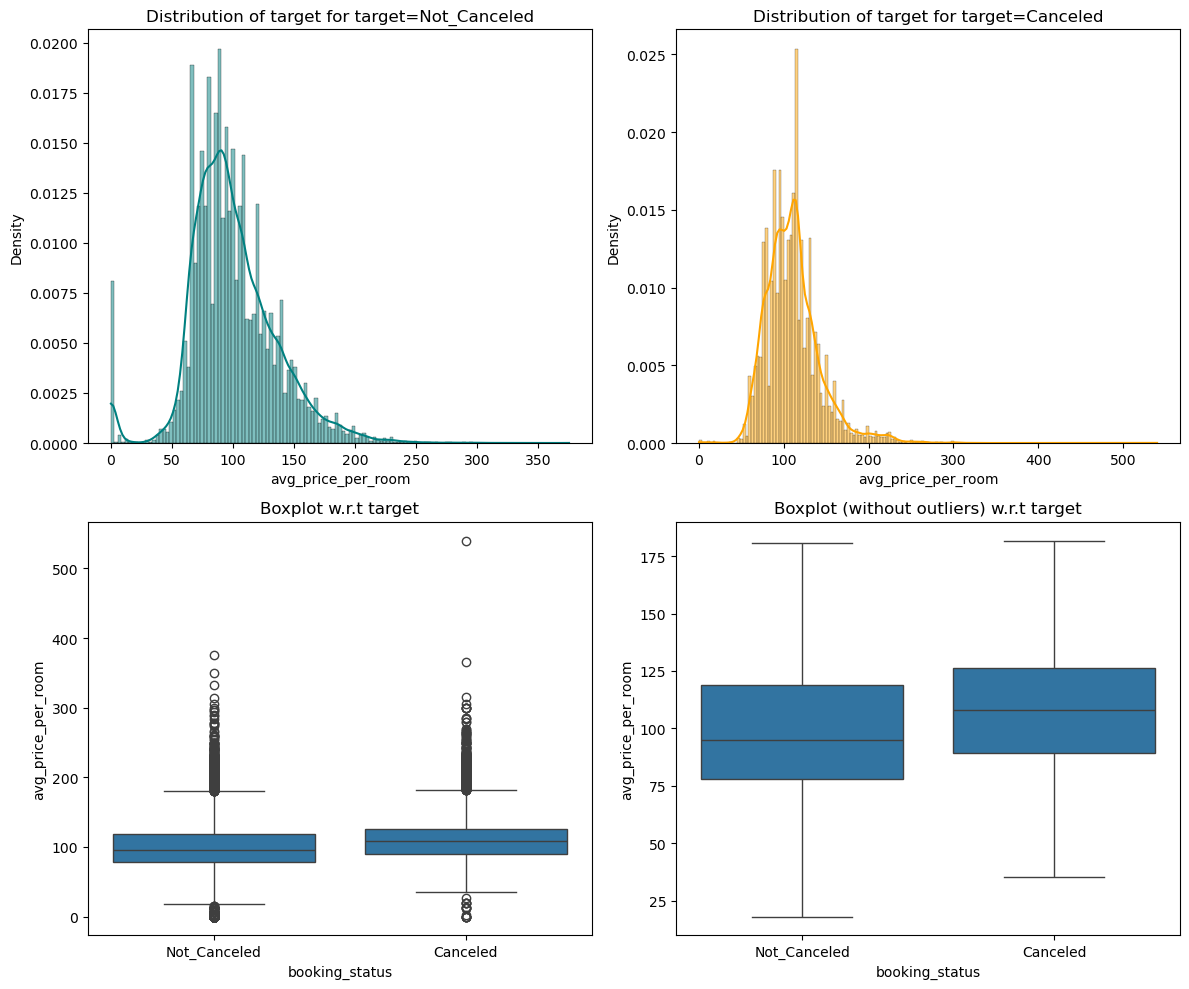

In [96]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* Higher priced rooms tend to have a higher cancellation rate.
* Lower priced rooms are more likely of being not canceled. Customers are more commited to complete their stay in the hotel. 

### 9. How prices vary across the months? 

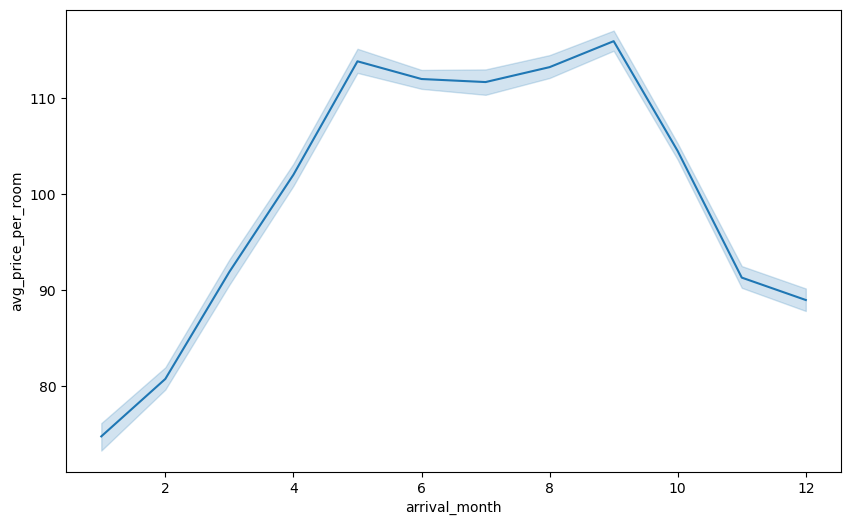

In [99]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="arrival_month", y="avg_price_per_room")
plt.show()

* The most expensive rates per room are placed between may to septemeber.

### 10. Percentage of bookings canceled each month 

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


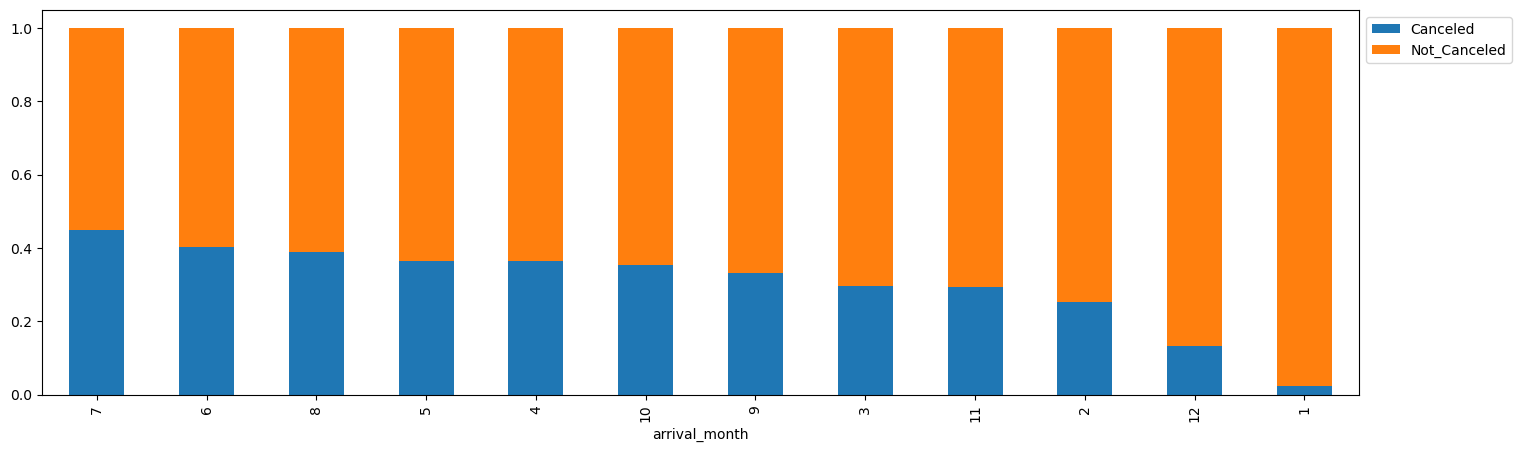

In [102]:
stacked_barplot(data, "arrival_month", "booking_status")

* October, September, August and July have the highest cancellations.
* January, February, and March have the lowest cancellations.
* December has a high booking rate and fewer Cancellations

### 11. Correlation 

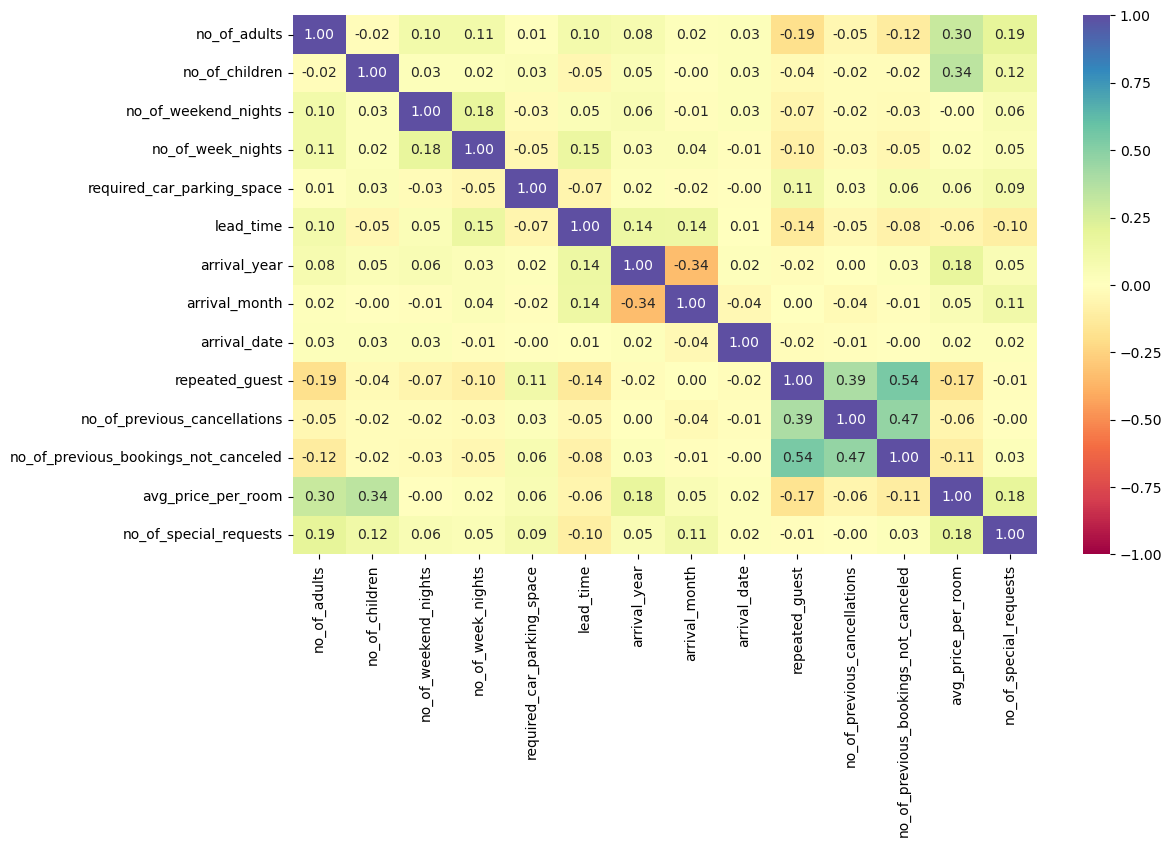

In [105]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### 12. Booking status and lead time

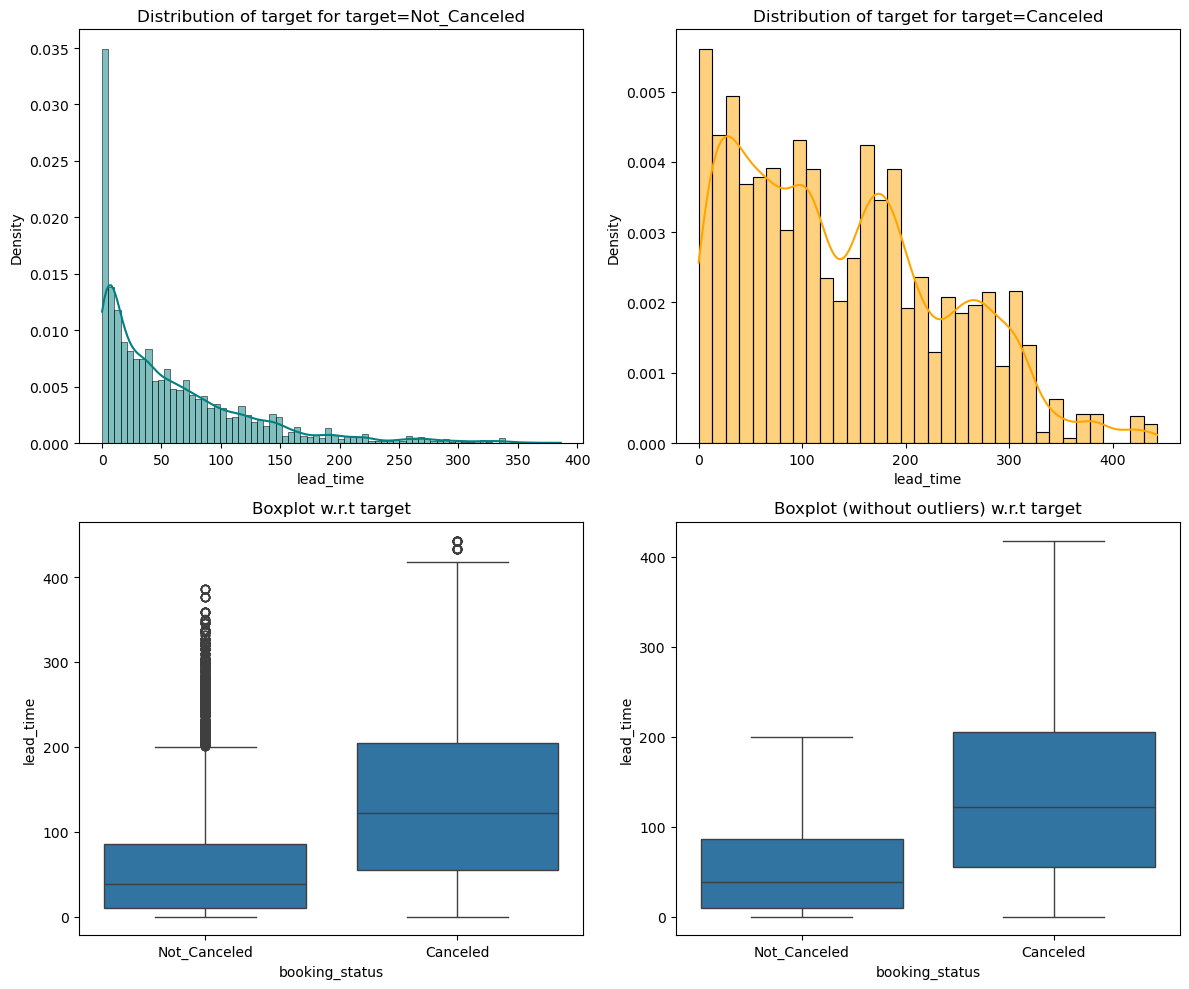

In [107]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* Short lead times are associated with a higher chance of the booking being not canceled.
* Longer lead times increase the probability of cancelation.
* The median lead time for canceled bookings is higher than for non canceled bookings. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing values

In [111]:
#Checking for missing values 
missing_values = data.isnull().sum()
print(missing_values)
print('')
it_has_missing_values = data.isnull().sum().any()
print("Are there any missing values: true or false?", it_has_missing_values)

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Are there any missing values: true or false? False


#### - No need of Featuring engineering

### Outlier detection 

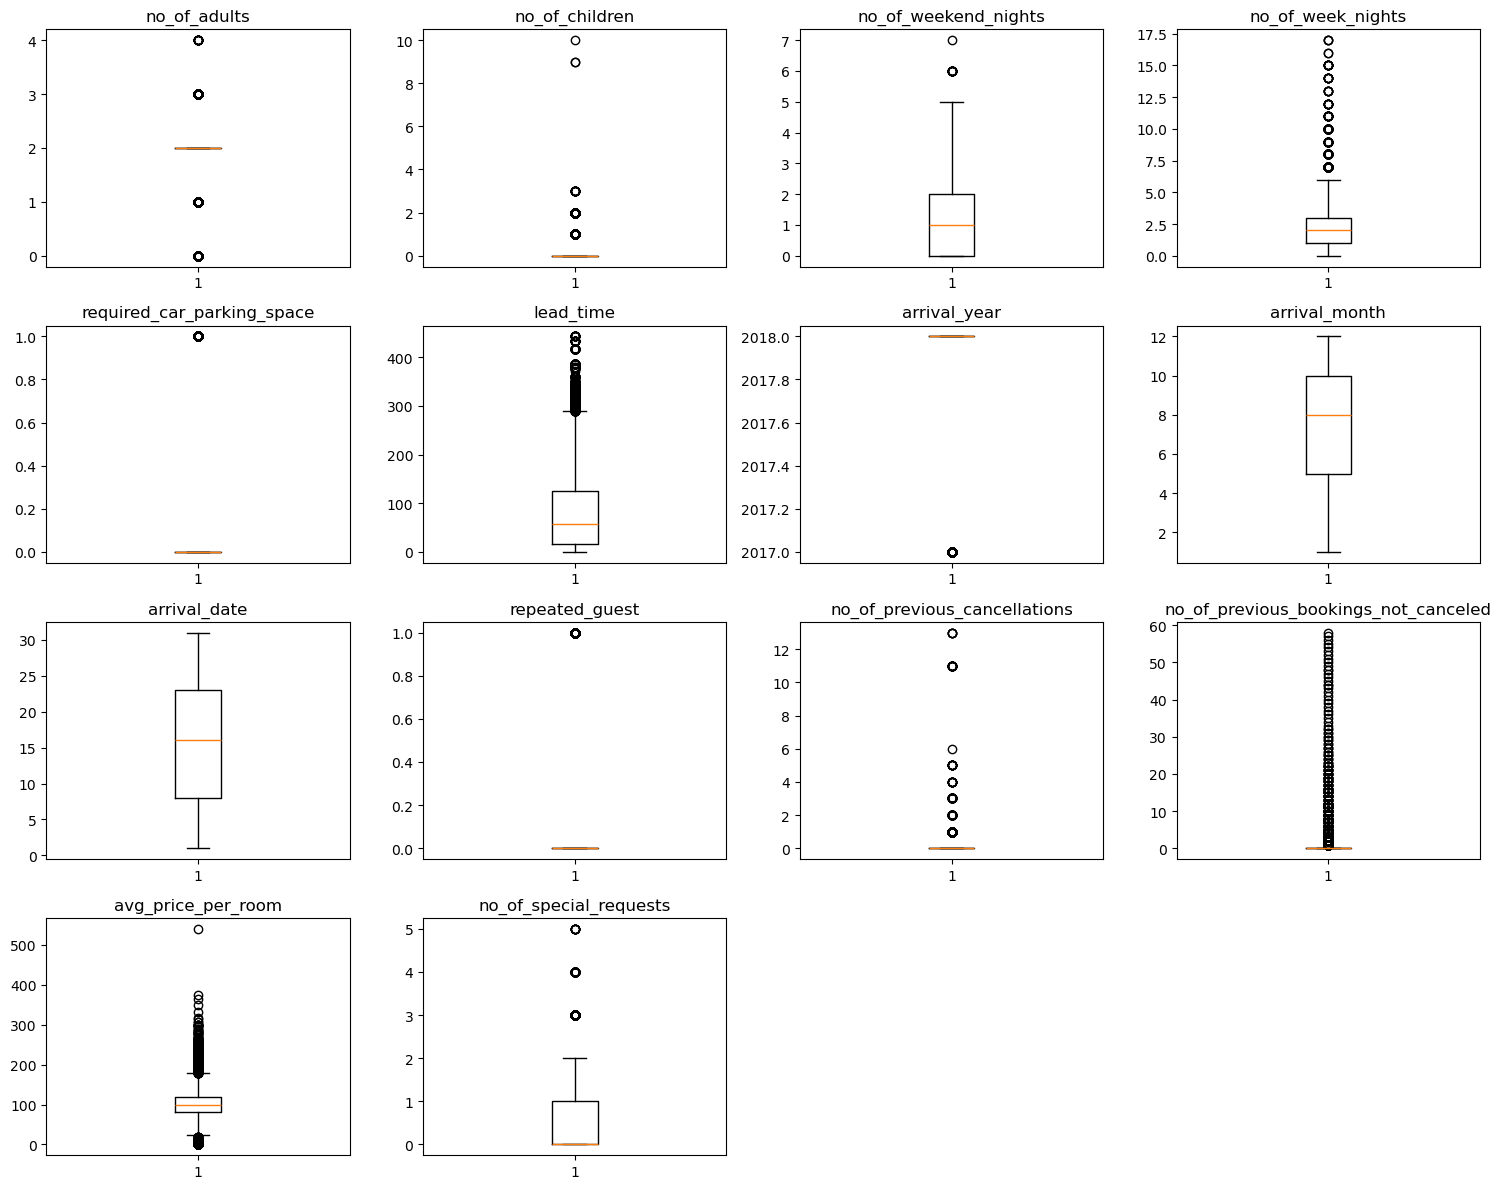

In [115]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are outliers in the data.
* However, I will not treat them as they are proper values.

### Model Evaluation Criteria

A model can yield incorrect predictions in the following ways:
1. Predicting that a customer will not cancel their booking, but the customer actually does cancel.
2. Predicting that a customer will cancel their booking, but the customer actually does not cancel.

Which scenario holds more significance?
Both scenarios are crucial because:

* If the model predicts that a booking will not be canceled, but it ends up being canceled, the hotel will lose resources and incur additional costs associated with distribution channels.

* If the model predicts that a booking will be canceled, but it is not, the hotel might not be able to deliver satisfactory services to the customer, having assumed the booking would be canceled. This could harm the hotel's brand reputation.

**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

### Metrics and confusion matrix functions

* The evaluate_classification_model_performance function will be used to check the model performance of models.
* The plot_confusion_matrix function will be used to plot the confusion matrix.

In [122]:
# defining a function to evaluate the performance of a classification model built using statsmodels
def evaluate_classification_model_performance(
    classifier, features, labels, threshold=0.5
):
    """
    Function to compute various metrics for assessing classification model performance

    classifier: the classification model
    features: independent variables
    labels: dependent variable
    threshold: threshold for classifying an observation as class 1
    """

    # determining which probabilities exceed the threshold
    predicted_probs = classifier.predict(features) > threshold
    # rounding the values to obtain class predictions
    predictions = np.round(predicted_probs)

    accuracy = accuracy_score(labels, predictions)  # calculate Accuracy
    recall = recall_score(labels, predictions)  # calculate Recall
    precision = precision_score(labels, predictions)  # calculate Precision
    f1 = f1_score(labels, predictions)  # calculate F1-score

    # creating a DataFrame to hold the performance metrics
    performance_metrics = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return performance_metrics

In [124]:
# Define a function to plot the confusion matrix of a classification model
def plot_confusion_matrix(classifier, features, labels, threshold=0.5):
    """
    Function to plot the confusion matrix with percentages for a classification model.

    classifier: the classification model
    features: independent variables
    labels: dependent variable
    threshold: threshold for classifying an observation as class 1
    """
    # Predicting class probabilities and determining class predictions based on the threshold
    predicted_probs = classifier.predict(features) > threshold
    cm = confusion_matrix(labels, predicted_probs)

    # Creating labels with absolute values and percentages
    labels_with_percentages = np.array(
        [
            [f"{item:0.0f}\n{item / cm.sum():.2%}" for item in row] 
            for row in cm
        ]
    )

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels_with_percentages, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 14})
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks(ticks=[0.5, 1.5], labels=['False', 'True'], fontsize=12)
    plt.yticks(ticks=[0.5, 1.5], labels=['False', 'True'], fontsize=12)
    plt.show()

In [126]:
# checking before creating dummy variables
data.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

### Data preparation for modeling

#### Creating training and test set 

In [130]:
# Step 1: Converting the target variable to category and then to numeric codes
Y = data['booking_status'].astype('category')
print("Categories in 'booking_status':", Y.cat.categories)

# Step 2: Creating a mapping of the original categories to their numeric codes
category_mapping = dict(enumerate(Y.cat.categories))
print("Category mapping:", category_mapping)

# Converting to numeric codes
Y = Y.cat.codes

# Step 3: Proceeding with the rest of the data preparation and model fitting

# Specifying the independent variables
X = data.drop(['booking_status'], axis=1)

# Adding a constant to the independent variables
X = sm.add_constant(X)

Categories in 'booking_status': Index(['Canceled', 'Not_Canceled'], dtype='object')
Category mapping: {0: 'Canceled', 1: 'Not_Canceled'}


In [132]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# Check for any non-numeric data types
print("Data types of X before conversion:\n", X.dtypes)

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Convert boolean columns to int
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

Data types of X before conversion:
 const                                   float64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
type_of_meal_plan_Meal Plan 2              bool
type_of_meal_plan_Meal Plan 3              bool
type_of_meal_plan_Not Selected             bool
room_type_reserved_Room_Type 2             bool
room_type_reserved_Room_Type 3             bool
room

In [134]:
# Check for any non-numeric data types after conversion
print("Data types of X after conversion:\n", X.dtypes)

Data types of X after conversion:
 const                                   float64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
type_of_meal_plan_Meal Plan 2             int64
type_of_meal_plan_Meal Plan 3             int64
type_of_meal_plan_Not Selected            int64
room_type_reserved_Room_Type 2            int64
room_type_reserved_Room_Type 3            int64
room_

In [136]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
1   0.67064
0   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
1   0.67638
0   0.32362
Name: proportion, dtype: float64


* There're around 67.06% of observations belongs to class 1 (Not Canceled) and 32.94% observations belongs to class 0 (Canceled), and this is preserved in the train and test sets.

### Model building - Logistic Regression model

* Now I'll perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

* Using statsmodels, I will be able to check the statistical validity of the model - identify the significant predictors from p-values that I get for each predictor variable.

In [141]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.3293
Time:                        15:38:19   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  924.5923    120.817      7.653      0.000     687.795    1161.390
no_of_adults                            -0.1135      

#### Observations

* Since 1 = not canceled and 0 = canceled.
* Negative values of the coefficients, for example lead time -0.0157, increase the probability of cancellation(0).
* Longer lead times are associated with a higher chance of cancellation.
* For avg_price_per_room = -0.0188, increase the probability of cancellation. Higher room prices, more cancellations. Lower room prices, more likely to keep the booking. This suggests that price sensitive guests are more likely to cancel. 
* Positive values of the coefficient, for example no_of_special_requests 1.4690, more special requests, higher the probability of not cancelling(1). This indicates that guests who personalize their stay are less likely to cancel.
*  P-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [148]:
print("Training performance:")
evaluate_classification_model_performance(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.89042,0.83213,0.86029


In [150]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09567
required_car_parking_space                    1.03993
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
repeated_guest                                1.78352
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

#### Remove market_segment_type_Online

In [153]:
X_train2 = X_train.drop("market_segment_type_Online", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                                  39391371.31459
no_of_adults                                  1.33178
no_of_children                                1.97735
no_of_weekend_nights                          1.06904
no_of_week_nights                             1.09512
required_car_parking_space                    1.03979
lead_time                                     1.39064
arrival_year                                  1.42838
arrival_month                                 1.27463
arrival_date                                  1.00672
repeated_guest                                1.78019
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65175
avg_price_per_room                            2.04959
no_of_special_requests                        1.24242
type_of_meal_plan_Meal Plan 2                 1.27150
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

In [155]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
evaluate_classification_model_performance(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80577,0.89025,0.83192,0.86009


### P-values 

In [158]:
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [160]:
X_train1 = X_train2[selected_features]
X_test1 = X_test[selected_features]

In [162]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print("Training performance:")
evaluate_classification_model_performance(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.89030,0.83147,0.85988


In [164]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.3283
Time:                        15:38:41   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            917.2860    120.456      7.615      0.000     681.196    1153.376
no_of_adults                      -0.1086      0.037     -2.914      0.

* Now no categorical feature has p-value greater than 0.05, so we'll consider the features in X_train1 as the final ones and lg1 as the model.

**Analazying model logistic regression**


1. Lead Time (-0.0157, p = 0.000). Longer lead times increase the probability of cancellation. Guests who book far in advance are more likely to cancel, possibly due to changing plans.

2. No. of Special Requests (+1.4699, p = 0.000). More special requests increase the probability of not canceling. Guests with requests (extra beds, late check-in, special meals) are more committed.

3. Average Price Per Room (-0.0192, p = 0.000). Higher room prices increase the probability of cancellation.

4. Repeated Guests (+2.7365, p = 0.000). Returning customers are far more likely to not cancel.

5. Required Car Parking Space (+1.5943, p = 0.000). Guests who book parking are more likely to keep their reservations.

6. Offline Bookings (+1.7867, p = 0.000). Offline customers are more committed - more likely not to cancel.

7. Corporate Bookings (+0.7928, p = 0.000). More likely not to cancel (corporate travelers have fixed schedules).



**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [169]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,inf,0.89706,0.85884,0.89706,0.95911,4.92495,0.98441,0.63563,1.04327,15.43271,0.79545,0.98102,4.34895,0.84752,0.75138,1.42763,1.32656,2.08593,2.62474,4.18352,2.20954,5.97002
Change_odd%,inf,-10.29408,-14.11592,-10.29399,-4.08928,392.49513,-1.55884,-36.43671,4.32668,1443.27137,-20.45542,-1.89807,334.89506,-15.24818,-24.86245,42.76310,32.65591,108.59262,162.47363,318.35213,120.95354,497.00168


Based on the odds: 
* Repeated_guest 15.43271. Guests who are returning customers are 15.43 times more likely to not cancel compared to first-time guests. 
* Required_car_parking_space  4.92495. Guests who request a parking space are 4.92 times more likely to not cancel than those who don’t.
* Lead time 0.98441. Longer lead times are associated with a higher chance of cancellation, early bookings are less risky.
* No_of_special_requests 4.3489. Guests who make special requests like late check-out are 4.34 times more likely to not cancel than those who don’t.

#### Checking model performance on the training set

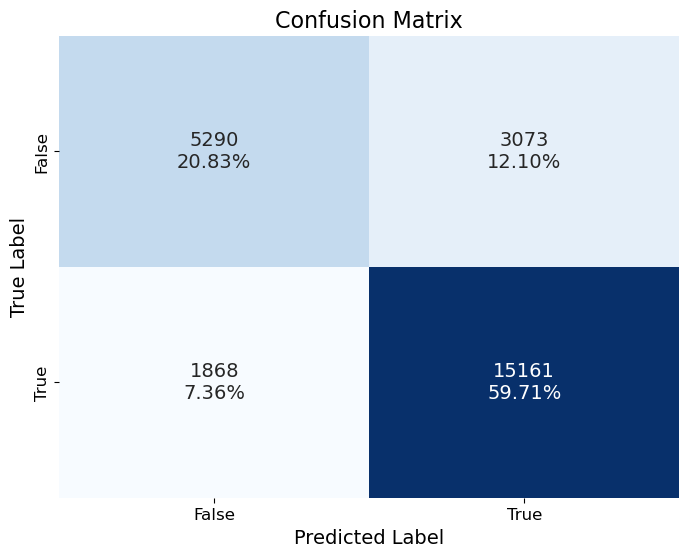

In [173]:
# creating confusion matrix
plot_confusion_matrix(lg1, X_train1, y_train)

In [175]:
print("Training performance:")
train_model_regression_default_threshold = evaluate_classification_model_performance(lg1, X_train1, y_train)
train_model_regression_default_threshold

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.89030,0.83147,0.85988


#### Checking model performance on the test set

- I have to first drop the columns from the test set that were dropped from the training set.

In [179]:
X_test1 = X_test1[list(X_train1.columns)]

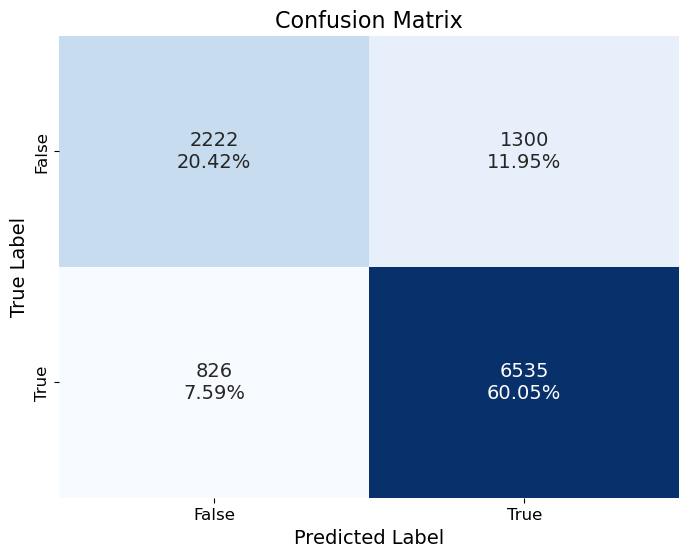

In [181]:
# creating confusion matrix
plot_confusion_matrix(lg1, X_test1, y_test)

In [183]:
print("Test performance:")
test_model_regression_default_threshold = evaluate_classification_model_performance(lg1, X_test1, y_test)
test_model_regression_default_threshold

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.88779,0.83408,0.86009


**ROC-AUC on training set**

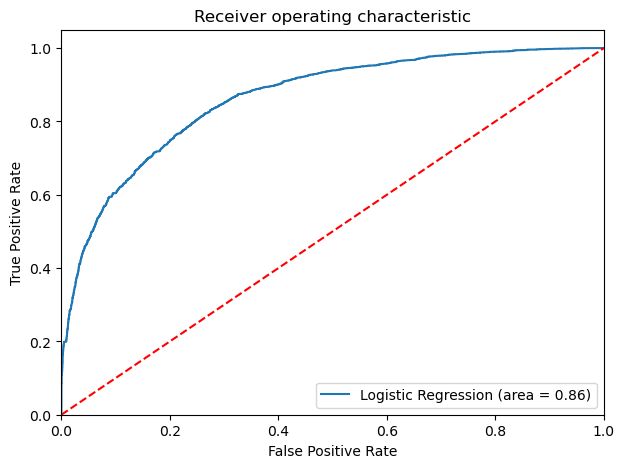

In [186]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model performance improvement 

* Let's see if the f1_score can be improved further by changing the model threshold
* First, I will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, I will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

**Optimal threshold using AUC ROC curve**

In [191]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6289584820770209


**Checking model performance on training set**

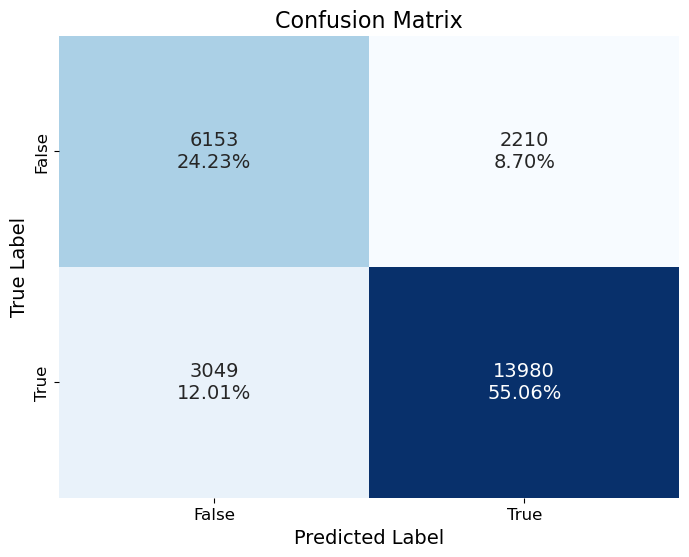

In [194]:
# creating confusion matrix
plot_confusion_matrix(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [196]:
print("Train performance:")
train_model_optimal_threshold_auc_roc = evaluate_classification_model_performance(lg1, X_train1, y_train,threshold=optimal_threshold_auc_roc)
train_model_optimal_threshold_auc_roc

Train performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.82095,0.86350,0.84169


* Precision of model has increased but the other metrics have reduced.
* The model continues giving a good performance.

**Check on test set**

In [200]:
print("Test performance:")
test_model_optimal_threshold_auc_roc = evaluate_classification_model_performance(lg1, X_test1, y_test,threshold=optimal_threshold_auc_roc)
test_model_optimal_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.82312,0.86842,0.84517


**Precision and recall curve to check if we can get a better threshold**

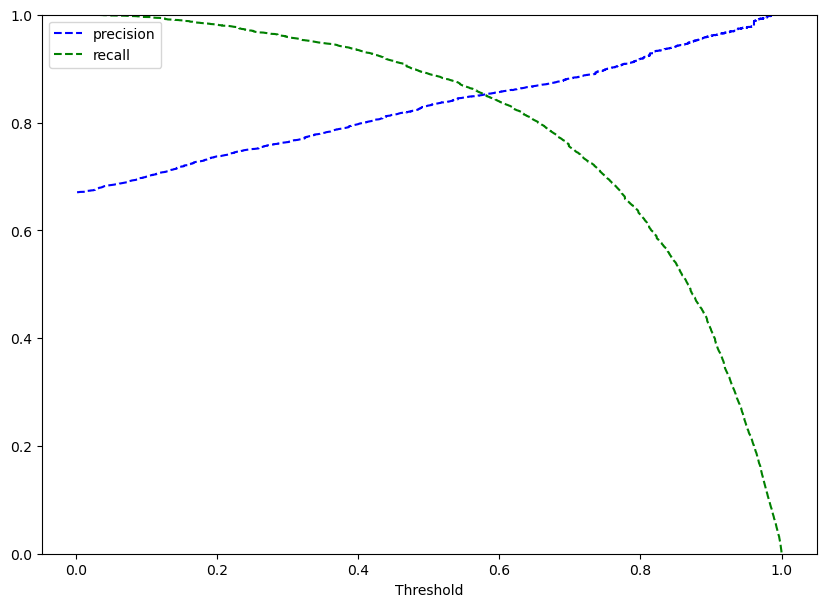

In [203]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**Using model with threshold = 0.45**

In [206]:
# setting the threshold
optimal_threshold_curve = 0.45

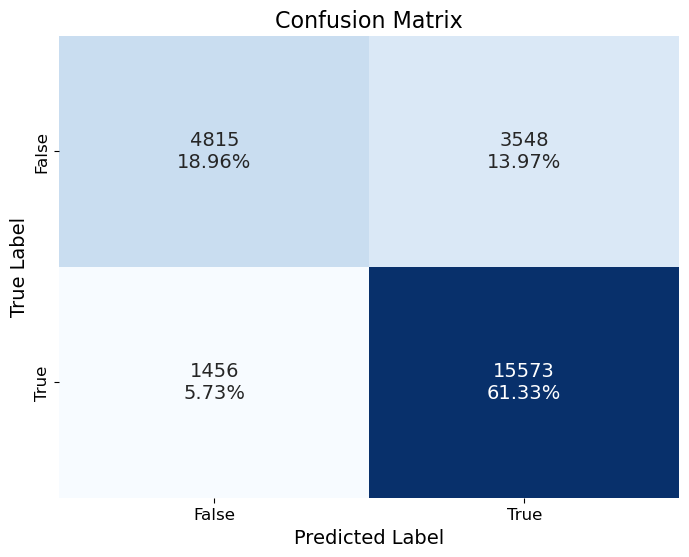

In [208]:
# creating confusion matrix
plot_confusion_matrix(lg1, X_train1, y_train, optimal_threshold_curve)

In [210]:
print("Train performance:")
train_model_optimal_threshold_curve = evaluate_classification_model_performance(lg1, X_train1, y_train,threshold=optimal_threshold_curve )
train_model_optimal_threshold_curve

Train performance:


,Accuracy,Recall,Precision,F1
0,0.80293,0.91450,0.81444,0.86158


In [212]:
print("Test performance:")
test_model_optimal_threshold_curve = evaluate_classification_model_performance(lg1, X_test1, y_test,threshold=optimal_threshold_curve )
test_model_optimal_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80869,0.91727,0.82091,0.86642


**Using model with threshold = 0.30**

In [215]:
# setting the threshold
optimal_threshold_curve2 = 0.30

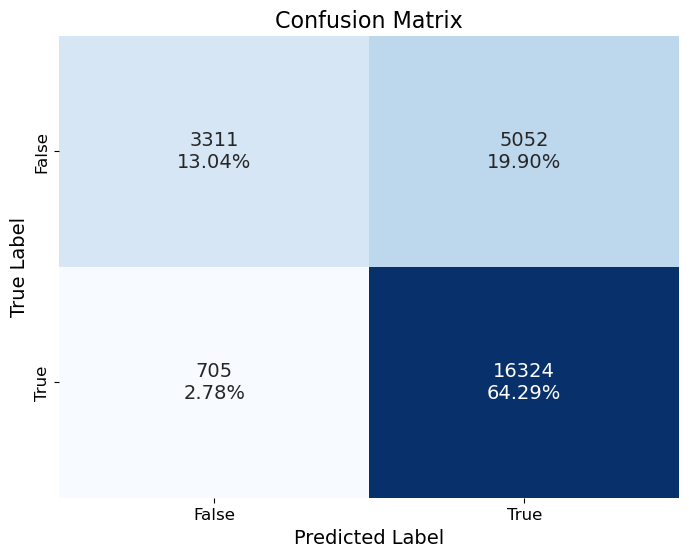

In [217]:
# creating confusion matrix
plot_confusion_matrix(lg1, X_train1, y_train, optimal_threshold_curve2)

In [219]:
print("Train performance:")
train_model_optimal_threshold_curve2 = evaluate_classification_model_performance(lg1, X_train1, y_train,threshold=optimal_threshold_curve2)
train_model_optimal_threshold_curve2

Train performance:


,Accuracy,Recall,Precision,F1
0,0.77328,0.95860,0.76366,0.85010


In [221]:
print("Test performance:")
test_model_optimal_threshold_curve2 = evaluate_classification_model_performance(lg1, X_test1, y_test,threshold=optimal_threshold_curve2)
test_model_optimal_threshold_curve2

Test performance:


,Accuracy,Recall,Precision,F1
0,0.78131,0.96142,0.77150,0.85605


## Model Performance Comparison and Final Model Selection

In [224]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        train_model_regression_default_threshold.T,
        train_model_optimal_threshold_auc_roc.T,
        train_model_optimal_threshold_curve.T,
        train_model_optimal_threshold_curve2.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.63 Threshold",
    "Logistic Regression-0.45 Threshold",
    "Logistic Regression-0.30 Threshold",
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.63 Threshold,Logistic Regression-0.45 Threshold,Logistic Regression-0.30 Threshold
Accuracy,0.80541,0.79289,0.80293,0.77328
Recall,0.89030,0.82095,0.91450,0.95860
Precision,0.83147,0.86350,0.81444,0.76366
F1,0.85988,0.84169,0.86158,0.85010


In [226]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        test_model_regression_default_threshold.T,
        test_model_optimal_threshold_auc_roc.T,
        test_model_optimal_threshold_curve.T,
        test_model_optimal_threshold_curve2.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.63 Threshold",
    "Logistic Regression-0.45 Threshold",
    "Logistic Regression-0.30 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.63 Threshold,Logistic Regression-0.45 Threshold,Logistic Regression-0.30 Threshold
Accuracy,0.80465,0.79601,0.80869,0.78131
Recall,0.88779,0.82312,0.91727,0.96142
Precision,0.83408,0.86842,0.82091,0.77150
F1,0.86009,0.84517,0.86642,0.85605


- 1 = Not Canceled
- 0 = Canceled
  
This means:

 * High recall = The model correctly identifies most "Not Canceled" bookings.
 * High precision = When the model predicts "Not Canceled," it is usually correct.
 * High F1-score = A good balance between precision and recall.

* All models perform well in general because accuracy is consistently high around 80%, F1 scores are good above 85% and it shos good balance between precision and recall.
* The best to models are Logistic Regression-default Threshold (0.5) and Logistic Regression-0.45 Threshold since they have a good balanced performance. Both are the best for generalization, the models perform well on unseen data while balancing false positives and false negatives.
* However, Logistic Regression-0.30 Threshold has the highest recall (96.14%), meaning it catches almost all cancellations but precision drops (77.15%), meaning more false positives, customers wrongly classified as "canceling".
* Logistic Regression-0.63 Threshold model has the highest precision (86.84%), meaning fewer false positives. But recall is lower (82.31%), some actual cancellations are missed.




## Building a Decision Tree model

In [231]:
X = data.drop(["booking_status"], axis=1)

# Step 1: Convert the target variable to category and then to numeric codes
Y = data['booking_status'].astype('category')
print("Categories in 'booking_status':", Y.cat.categories)

# Step 2: Create a mapping of the original categories to their numeric codes
category_mapping = dict(enumerate(Y.cat.categories))
print("Category mapping:", category_mapping)

# Convert to numeric codes
Y = Y.cat.codes
print("Numeric codes in 'Y':", Y.unique())

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

Categories in 'booking_status': Index(['Canceled', 'Not_Canceled'], dtype='object')
Category mapping: {0: 'Canceled', 1: 'Not_Canceled'}
Numeric codes in 'Y': [1 0]


In [233]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
1   0.67064
0   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
1   0.67638
0   0.32362
Name: proportion, dtype: float64


* There're around 67.06% of observations belongs to class 1 (Not Canceled) and 32.94% observations belongs to class 0 (Canceled), and this is preserved in the train and test sets.

**Using functions to calculate different metrics and confusion matrix**

In [237]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [239]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [241]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Checking on training set**

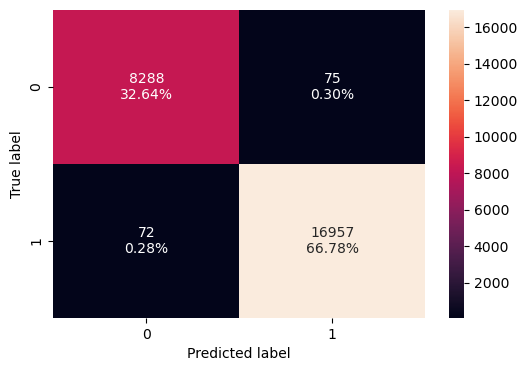

In [244]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [246]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99421,0.99577,0.99560,0.99568


* Too good, it is probably overfitting. 

**Checking on testing set**

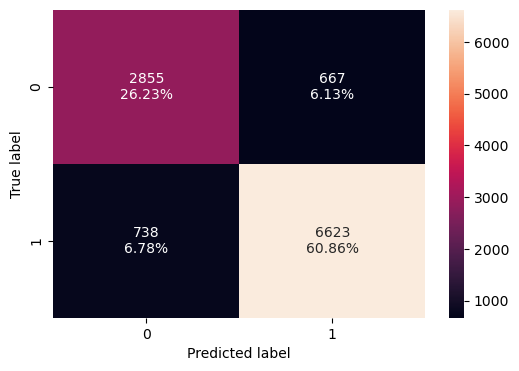

In [250]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [252]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.87090,0.89974,0.90850,0.90410


## Do we need to prune the tree?

* yes, it is overfitting

### Pre prunning

**Checking important features**

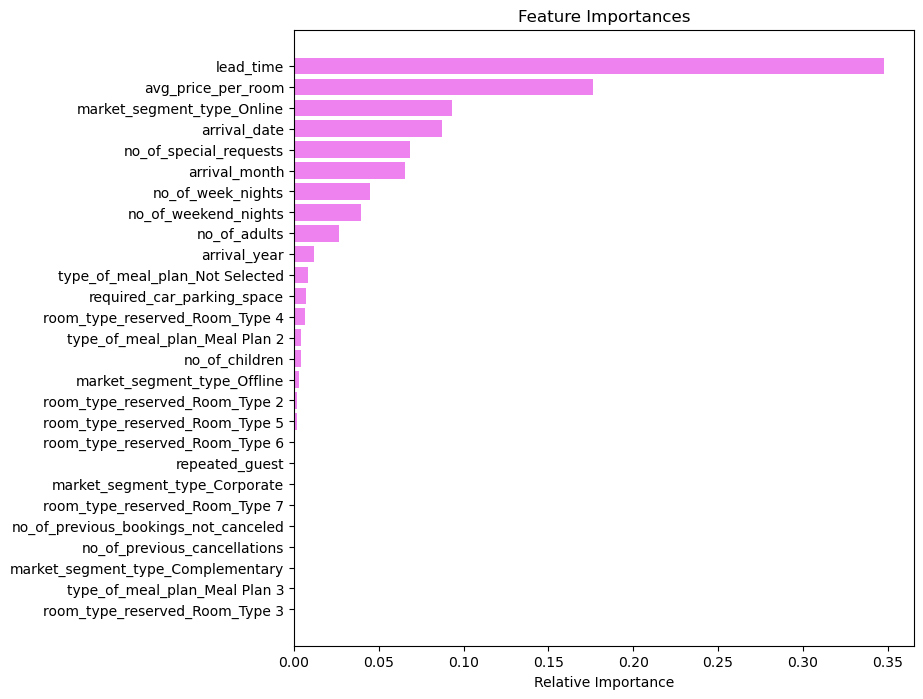

In [258]:
feature_names = list(X_train.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [262]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=75,
                       min_samples_split=10, random_state=1)

**Checking on tune training set**

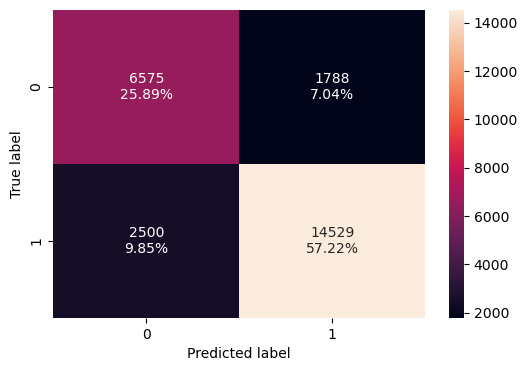

In [264]:
confusion_matrix_sklearn(estimator,X_train, y_train)

In [265]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83113,0.85319,0.89042,0.87141


**Checking on tune testing set**

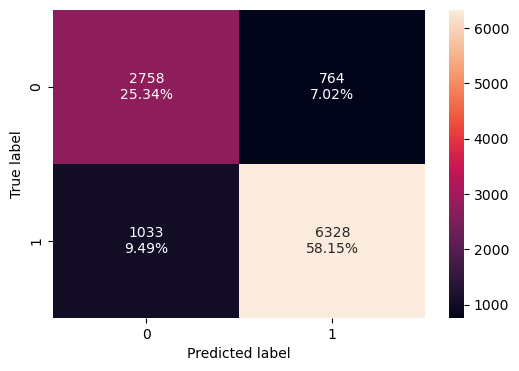

In [267]:
confusion_matrix_sklearn(estimator,X_test, y_test)

In [268]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83488,0.85967,0.89227,0.87567


* Recall (0.85967): The model correctly identifies 85.97% of actual positives. If false negatives are costly, recall is crucial.
* Precision (0.89227): When the model predicts positive, it's correct 89.23% of the time. High precision means fewer false positives.
* F1-score (0.87567): A balance between precision and recall. In this case it's close to both values, the model maintains a good balance.

 - The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.86 which shows that the model is able to generalize well on unseen data.

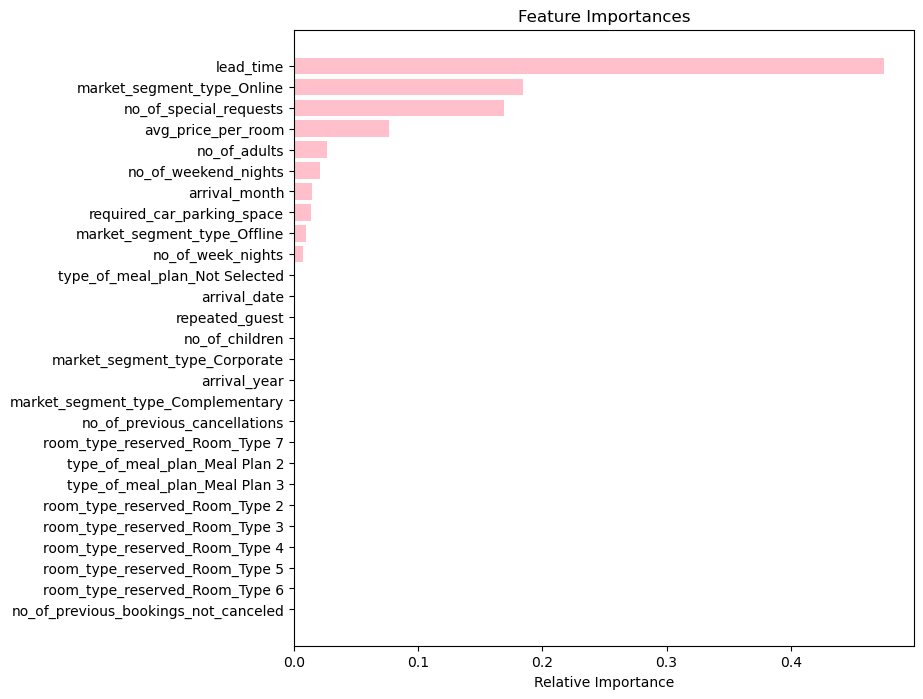

In [280]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

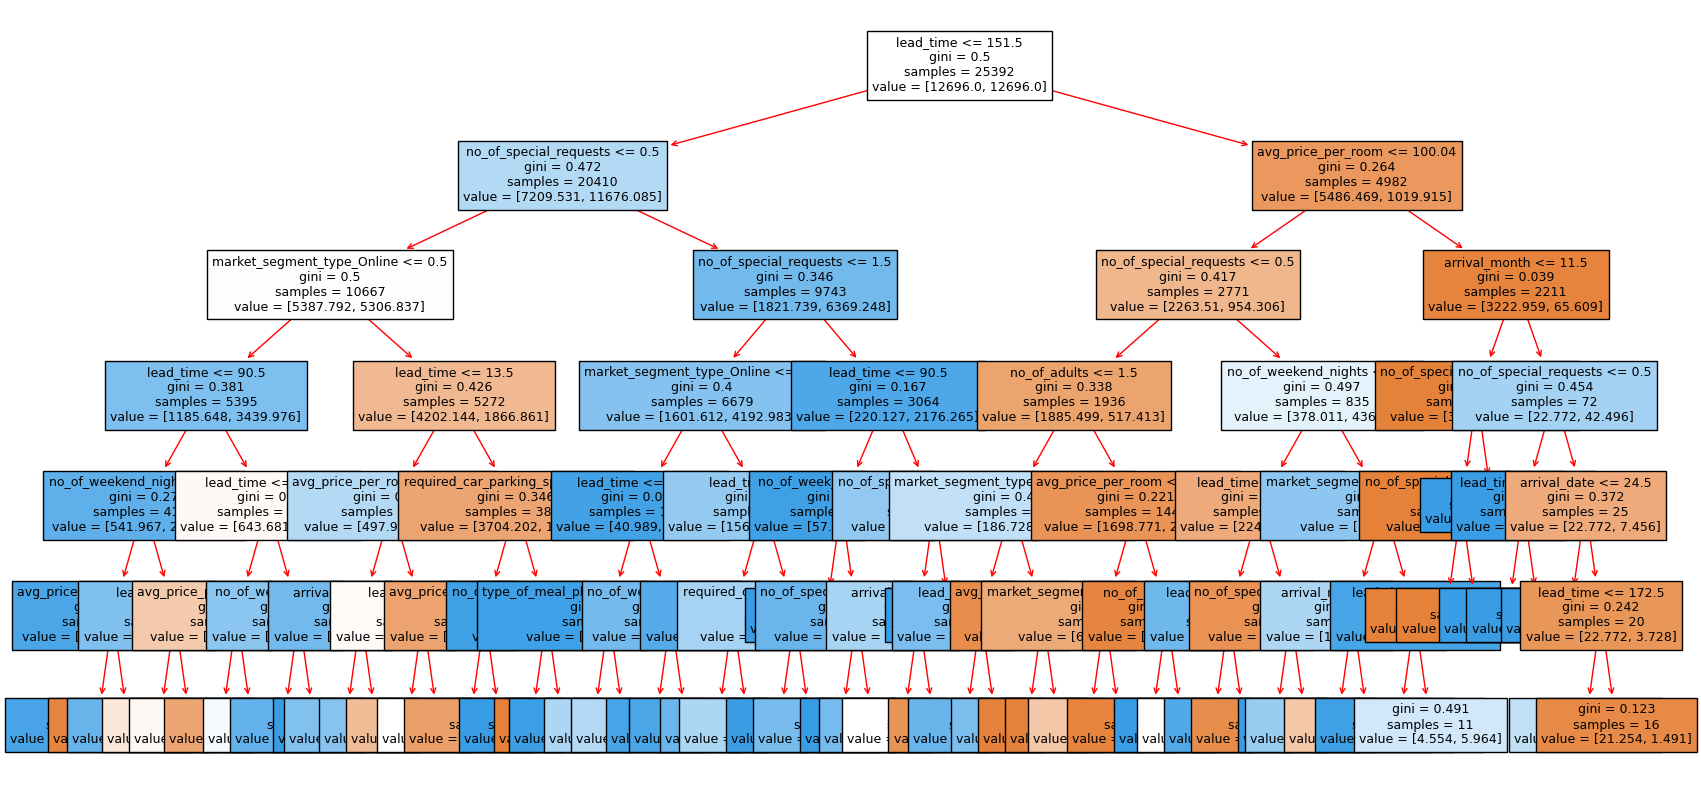

In [282]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("red")
        arrow.set_linewidth(1)
plt.show()

In [283]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [132.08, 1736.39] class: 1
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [25.81, 0.75] class: 0
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [223.16, 960.27] class: 1
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [160.92, 129.73] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [227.72, 214.72] class: 0
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [285.41, 82.76] 

### Pos prunning 

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [289]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [291]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1833,0.00890,0.32806
1834,0.00980,0.33786
1835,0.01272,0.35058
1836,0.03412,0.41882


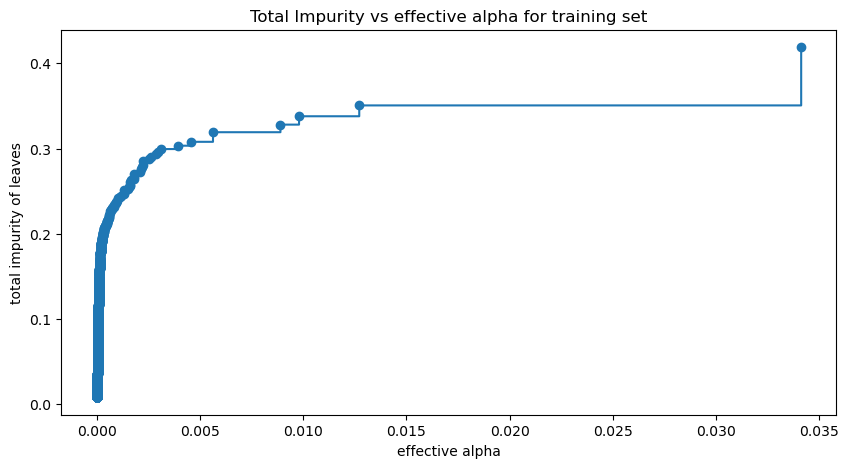

In [293]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [296]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136949


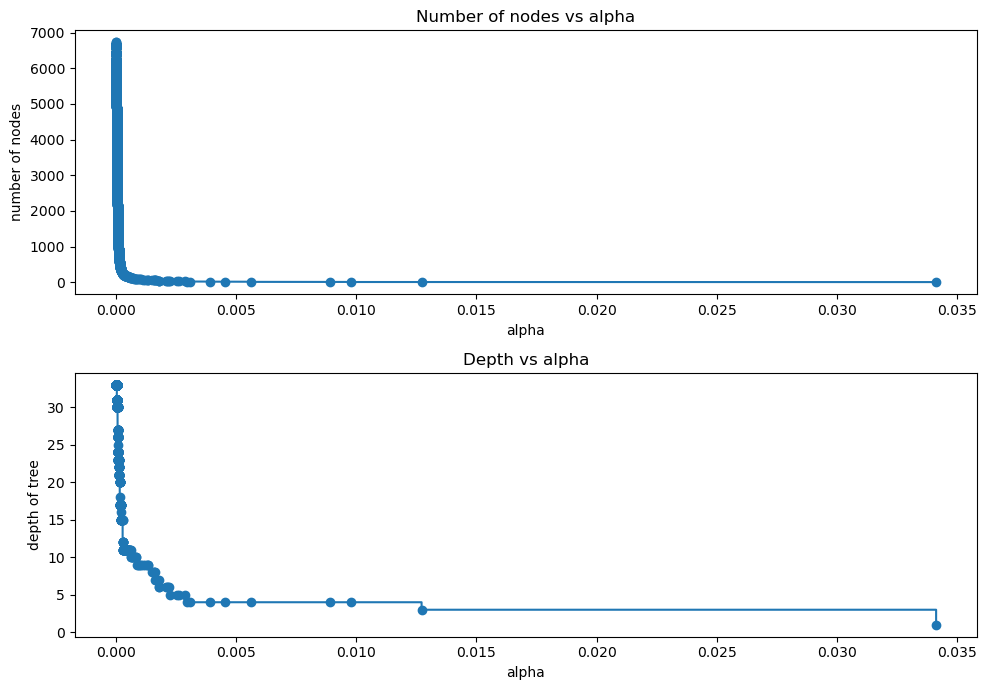

In [297]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [299]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [300]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

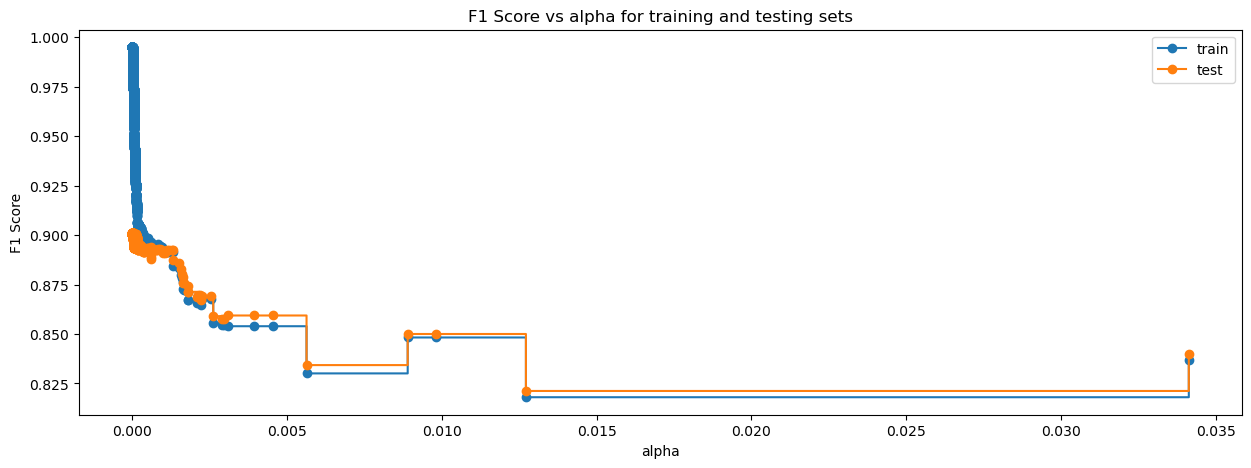

In [301]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [302]:
# creating the model where we get highest train and test F1
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=1.9197336331191328e-05,
                       class_weight='balanced', random_state=1)


**Perfomance train set pospruning**

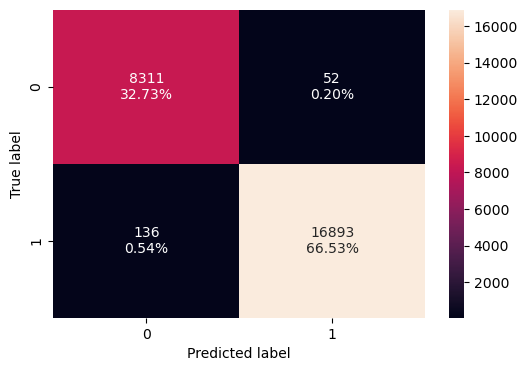

In [304]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [305]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.99260,0.99201,0.99693,0.99447


**Perfomance test set pospruning**

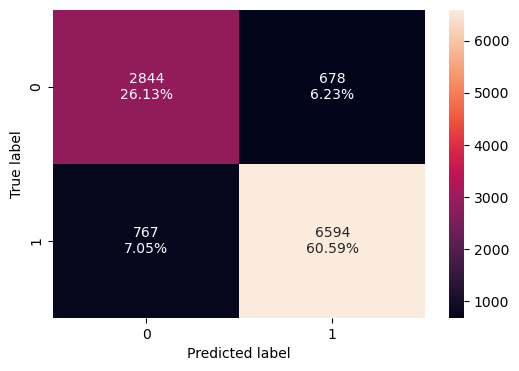

In [307]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [317]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86722,0.89580,0.90677,0.90125


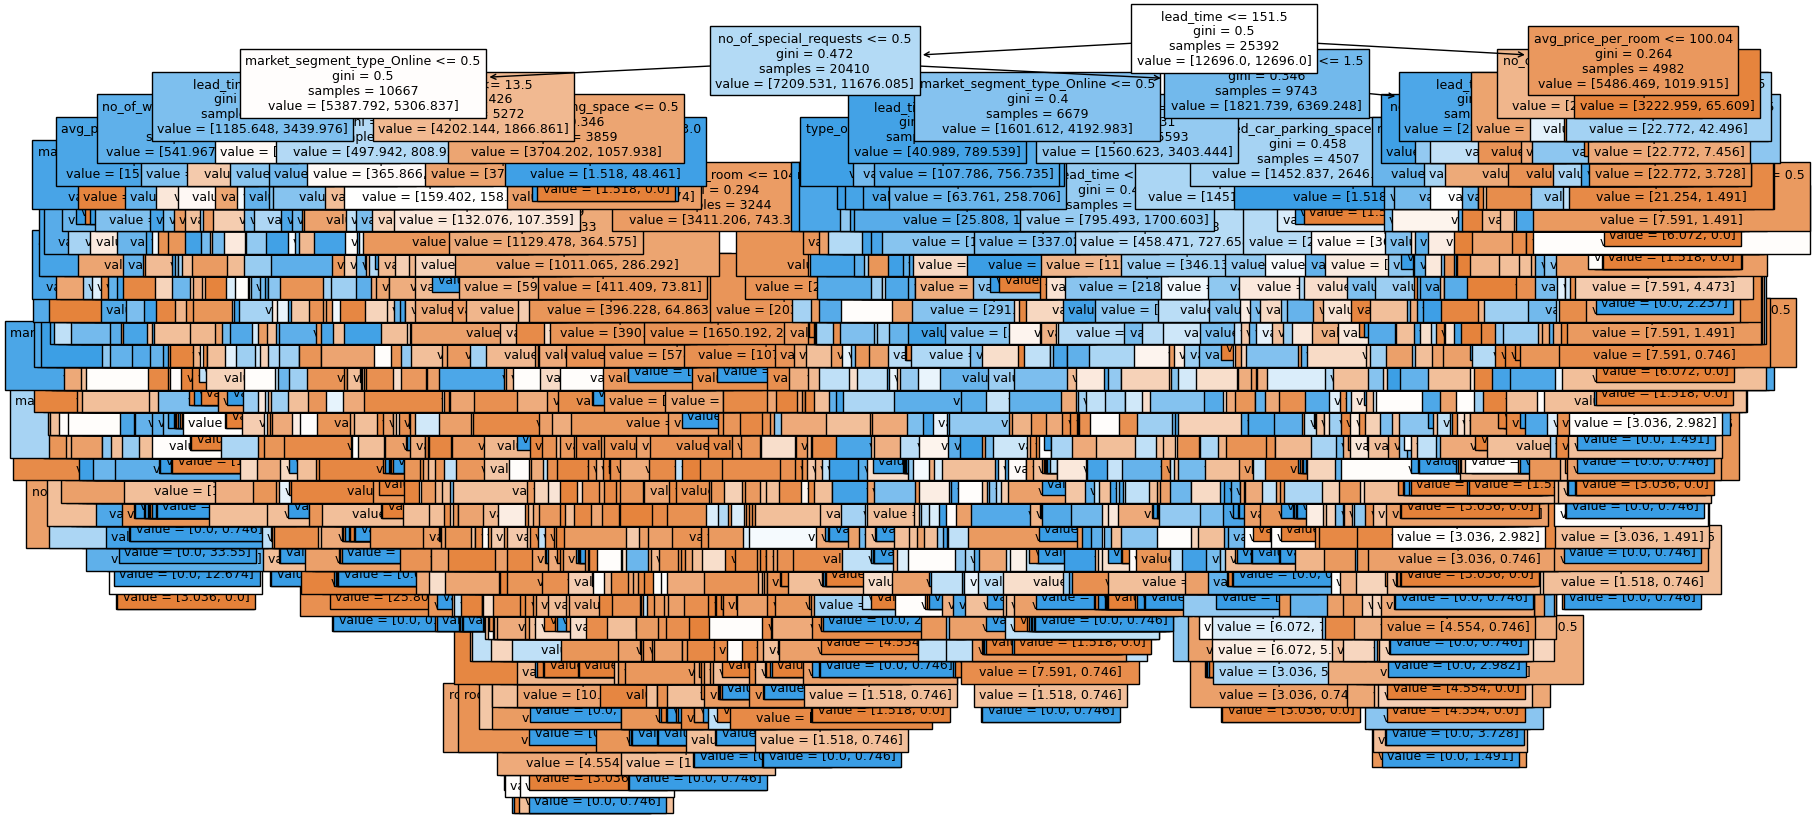

In [319]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [320]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

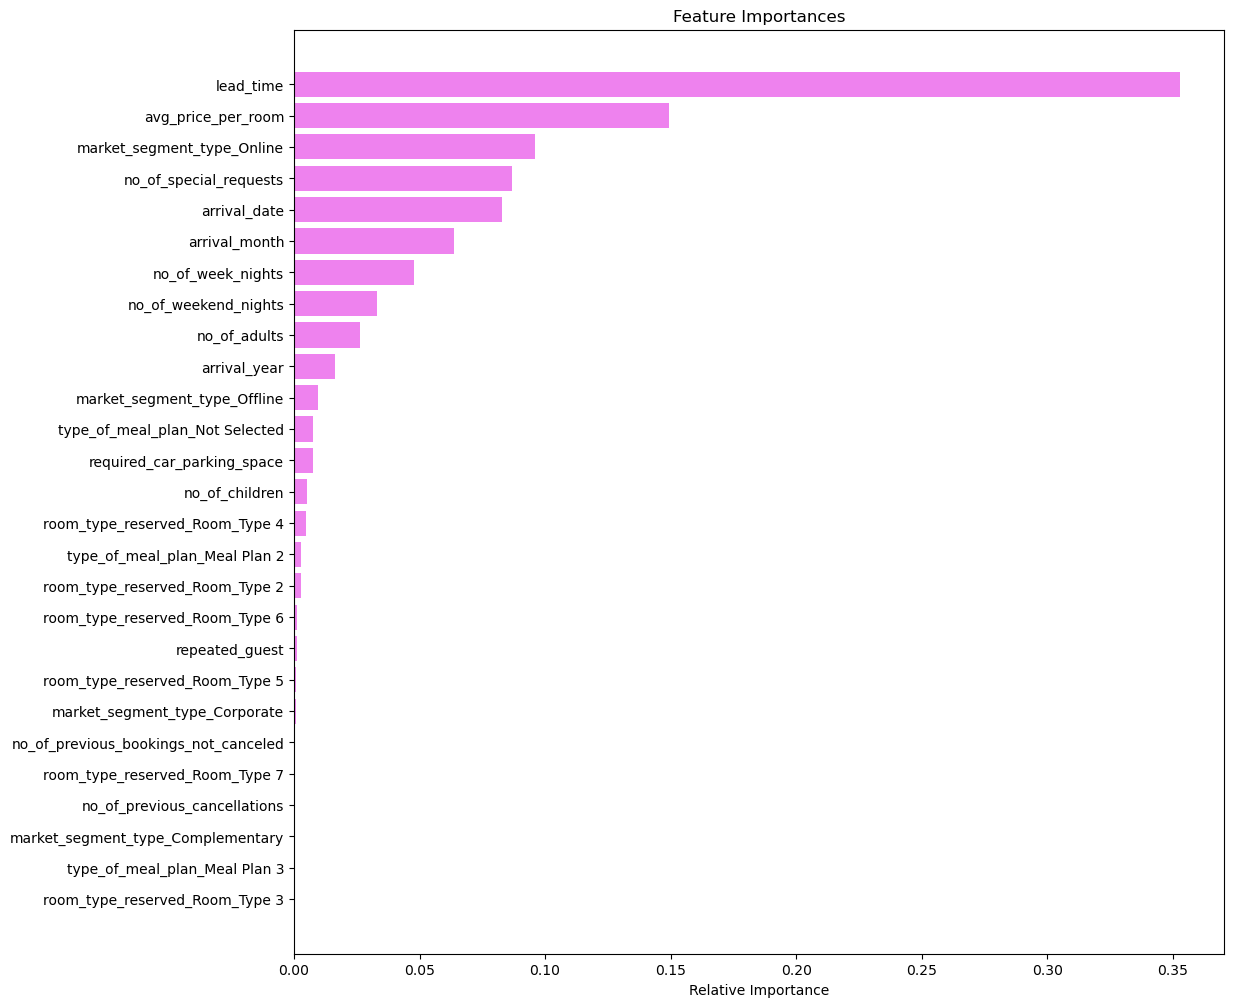

In [321]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Recall vs alpha for training and testing sets

In [326]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [327]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

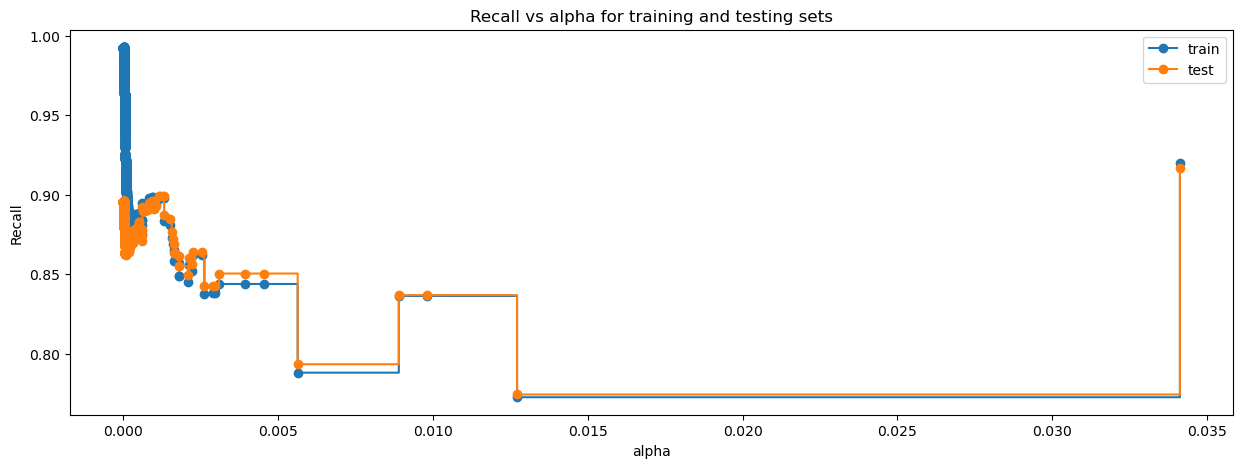

In [328]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [329]:
# creating the model where we get highest train and test recall
index_best_model2 = np.argmax(recall_test)
best_model2 = clfs[index_best_model2]
print(best_model2)

DecisionTreeClassifier(ccp_alpha=0.034120904381342465, class_weight='balanced',
                       random_state=1)


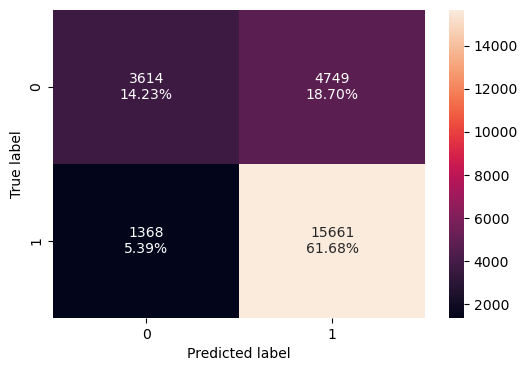

In [334]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [336]:
decision_tree_post_perf_train2 = model_performance_classification_sklearn(
    best_model2, X_train, y_train
)
decision_tree_post_perf_train2

,Accuracy,Recall,Precision,F1
0,0.75910,0.91967,0.76732,0.83661


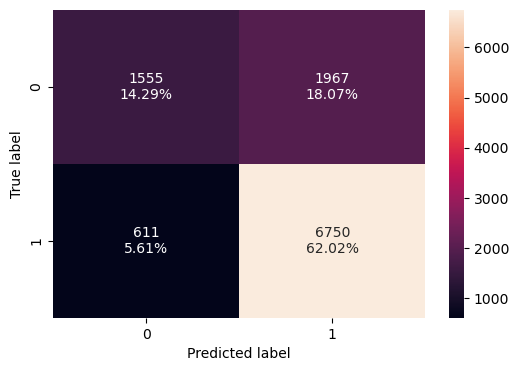

In [338]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [340]:
print("Test performance")
decision_tree_post_test2 = model_performance_classification_sklearn(
    best_model2, X_test, y_test
)
decision_tree_post_test2

Test performance


,Accuracy,Recall,Precision,F1
0,0.76312,0.91699,0.77435,0.83966


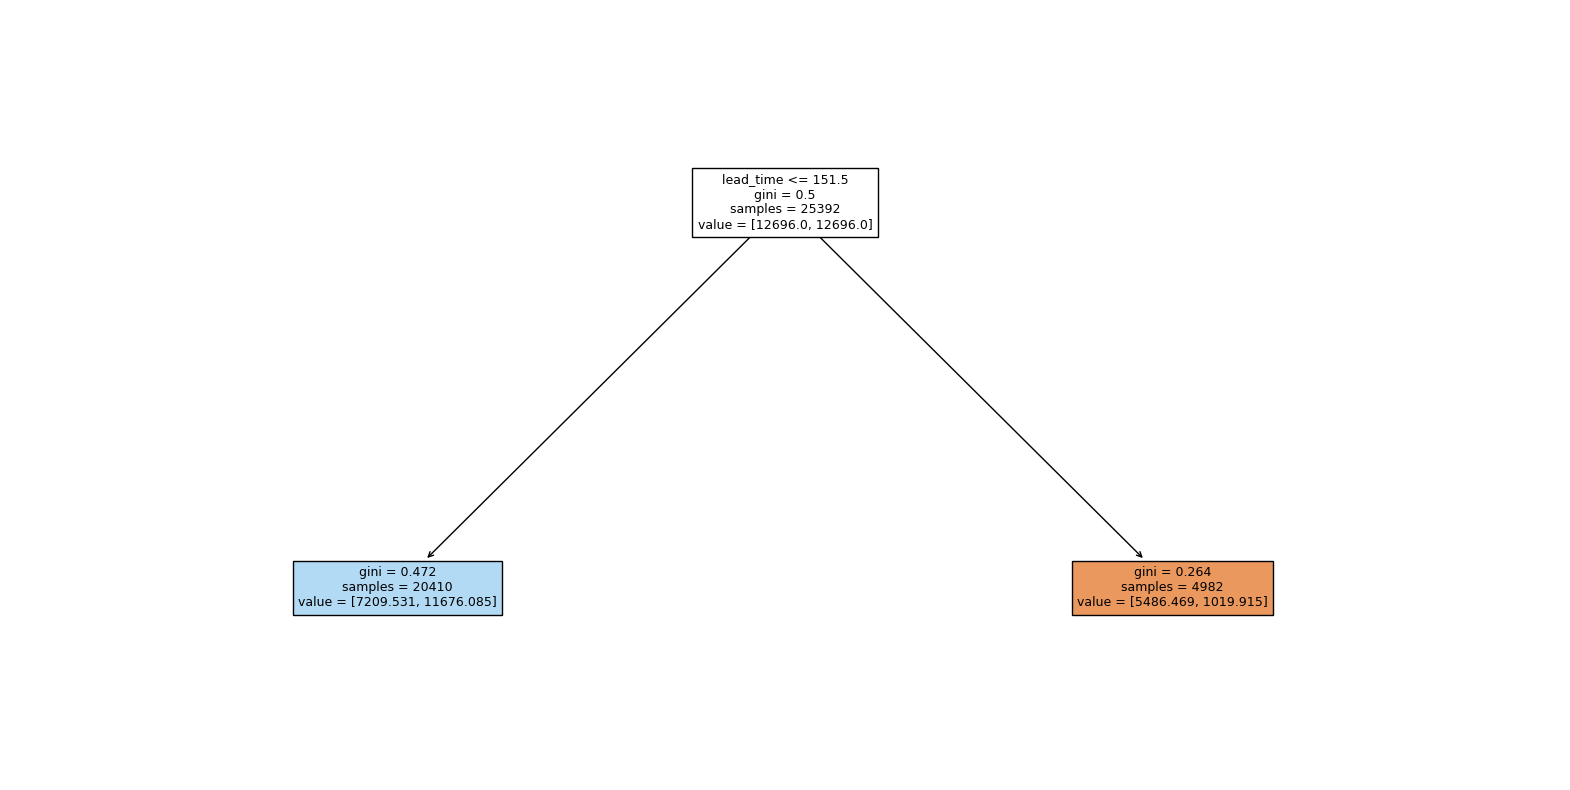

In [342]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [344]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- weights: [7209.53, 11676.09] class: 1
|--- lead_time >  151.50
|   |--- weights: [5486.47, 1019.91] class: 0



* Shorter lead times (≤151.5). Higher chance of guests showing up(Not canceled). Longer lead times (>151.5). Higher chance of cancellations.

In [347]:
importances2 = best_model2.feature_importances_
indices2 = np.argsort(importances2)

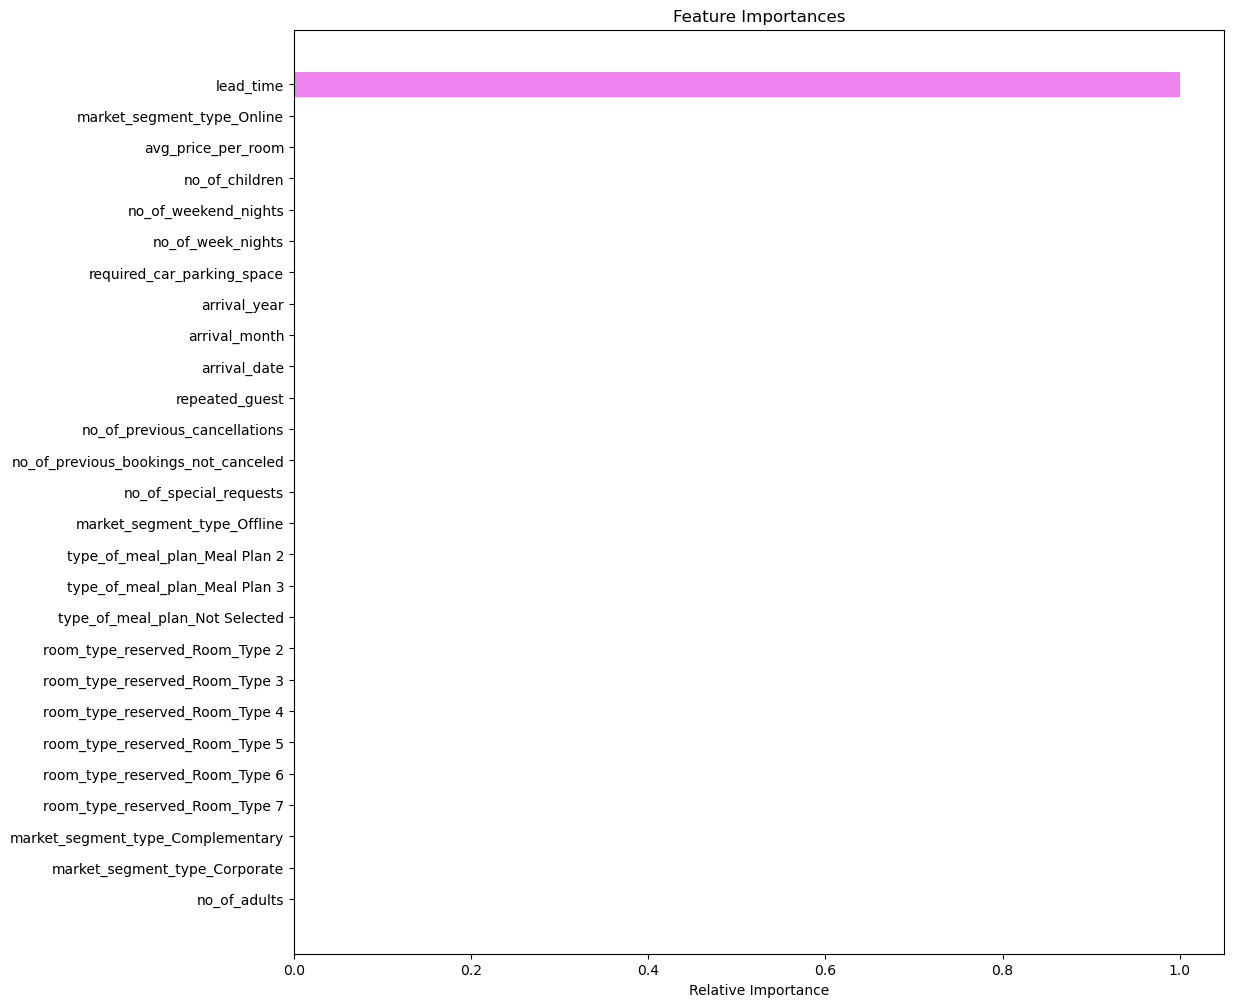

In [349]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices2)), importances2[indices2], color="violet", align="center")
plt.yticks(range(len(indices2)), [feature_names[i] for i in indices2])
plt.xlabel("Relative Importance")
plt.show()

* Lead time is a crucial feature for the analysis.
* It can be underfitting

## Model Performance Comparison and Conclusions

In [353]:
# training performance comparison

models_train_comp_df = pd.concat(
    [ 
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
        decision_tree_post_perf_train2.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)- F1",
    "Decision Tree (Post-Pruning)- Recall ",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)- F1,Decision Tree (Post-Pruning)- Recall
Accuracy,0.99421,0.83113,0.99260,0.75910
Recall,0.99577,0.85319,0.99201,0.91967
Precision,0.99560,0.89042,0.99693,0.76732
F1,0.99568,0.87141,0.99447,0.83661


In [355]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
        decision_tree_post_test2.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning) - F1",
    "Decision Tree (Post-Pruning) - Recall",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning) - F1,Decision Tree (Post-Pruning) - Recall
Accuracy,0.87090,0.83488,0.86722,0.76312
Recall,0.89974,0.85967,0.89580,0.91699
Precision,0.90850,0.89227,0.90677,0.77435
F1,0.90410,0.87567,0.90125,0.83966


* A model is overfitting when it performs extremely well on training data but drops significantly on test data. The gap between training and test performance is key to detecting overfitting.
* Based on this: Model 1 (No Pruning) and Model 3 Decision Tree (Post-Pruning) are overfitting models. Model 1 has extremely high training accuracy (99.42%) but a big drop (-12.3%) on test accuracy (87.09%) same as model 3 training accuracy 99% but test accuracy around 86%. The model is memorizing training data instead of learning general patterns.
* The best model is model 2 Decision Tree (Pre-Pruning). Training and test scores are very close (no overfitting). Generalizes well (Accuracy: 83.49%, F1: 87.57%), it has good balance of precision and recall. This suggests that pre-pruning prevented overfitting effectively.
* Model 4 (Post-Pruning - Recall Focus) is also a great model but it can be underfitting. It does not overfit. It has a better recall metric than model no 2. This model confirms the logistic regression model finding that lead time has a negative coefficient meaning longer lead times increase the probability of cancellation. Shorter lead times (≤151.5). It has higher chance of guests showing up.

## Actionable Insights and Recommendations

* Based on the model logistic default threshold and prepruning tree which are the best models, I can recommend that since longer lead time increase the probability of cancellations, it is suggested to implement non-refundable discounts for early bookings and the hotel can offer flexible modifications instead of cancellations.
  
* Also, the hotel can encourage guests to make personalized requests to reduce cancellation rates. Regarding prices, it is known that higher room prices increase the probability of cancellation so it can be offered discounted prepaid rates for expensive rooms and it can be introduced last-minutes deals for unsold premium rooms.
  
* For the repeated guests, it is seen that loyalty leads to higher retention so it can be offered exclusive deals for returning guests. On the other hand, the hotel can plan to target business travelers and direct offline bookings for lower cancellation risks. Offer preferential rates for business guests since they are more likely not to cancel. Last but not least the hotel should optimize parking policies by encouraging advance reservations for committed guests.

* The hotel should focus on returning guests and parking users since they are highly committed customers. Hotel needs to be cautious with long lead times considering prepaid nights or requiring advance deposits or stricter cancellation policies. It should encourage special requests since it indicates a guest is more likely to complete their stay.

* Consider:
  - Loyalty program where repeat guests earn discounts, free nights, or upgrades.
  - Exclusive perks (early check-in, late check-out) for returning customers.
  - Send personalized offers to past guests, encouraging them to rebook.
  - Offer last minute deals on online platforms to attract travelers.

